In [1]:
import sys #only needed to determine Python version number
import matplotlib as mpl
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats

import statsmodels.api as sm
#import re    # regular expressions

In [2]:
print('Environment \n----------------------------------------------------------------------------------------------')
print('Python: version ' + sys.version)
print('Pandas: version ' + pd.__version__)
print('Matplotlib: version ' + mpl.__version__)

Environment 
----------------------------------------------------------------------------------------------
Python: version 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
Pandas: version 0.25.0
Matplotlib: version 3.0.2


In [3]:
# Environment
warnings.filterwarnings("ignore")

# Pandas configuration
#pd.set_option('display.max_row', 20)
pd.set_option('precision', 4)

In [4]:
# Plot configuration
plt.figure(figsize=(16, 6))
plt.style.use('fivethirtyeight')

# Seaborn configuration
sns.set(color_codes=True)

# Enable inline plotting
%matplotlib inline

mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.titleweight'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['figure.figsize'] = 11.7,8.27
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [14]:
#df_index = pd.DataFrame(list(df_eventsGrouped.index), columns=["EventDate"])
#df_index['EventDate'].head()

In [15]:
#df_eventsGrouped['EventDate'] = pd.to_datetime(df_index['EventDate'], format='%d/%m/%Y')

In [16]:
#df_eventsGrouped.head()

In [17]:
#ax = sns.scatterplot(data=df_events, x="Date", y="Category", hue="Category")
#ax.set(title="Events in Valencia")
#plt.show()
#plt.clf()

## Hotels in Booking.com

In [72]:
# Loading hotels in Valencia, from Booking.com, to a data frame
df_propertyType = pd.read_csv(".\\data\\HotelsVLC.csv", sep=';', encoding='utf-8', header=0, na_values=['NA'])

In [73]:
# Check for null values in the dataset
print(df_propertyType.isnull().sum())

propertyId      0
propertyType    0
name            0
district        0
coords          0
zipcode         0
dtype: int64


In [74]:
print("Shape of propertyType Dataframe: {}".format(df_propertyType.shape))

Shape of propertyType Dataframe: (94, 6)


In [75]:
# Sorting by propertyId
df_propertyType.sort_values("propertyId", inplace = True)

In [76]:
df_propertyType.head(10)

,propertyId,propertyType,name,district,coords,zipcode
0,12656,Hotel,Sol Playa,"Poblados marítimos, Valencia","-0.323789566755295,39.4650841913551",46011
1,13270,Hotel,Melia Plaza Valencia,"Ciutat Vella, Valencia","-0.376952290534973,39.4710278753057",46002
2,14441,Hotel,Hotel Turia,"Campanar, Valencia","-0.388724505901337,39.4802276264005",46009
3,14580,Hotel,El Coso,"Poblados marítimos, Valencia","-0.323579013347626,39.4637061283809",46011
4,23332,Hotel,Hotel Miramar,"Poblados marítimos, Valencia","-0.323690325021744,39.4642807560034",46011
5,24498,Hotel,El Globo,"Poblados marítimos, Valencia","-0.323730558156967,39.4647808334785",46011
6,90443,Hotel,Petit Palace Plaza de la Reina,"Ciutat Vella, Valencia","-0.37554144859314,39.47305074477",46002
7,90484,Hotel,Eurostars Gran Valencia,"Benicalap, Valencia","-0.398129671812057,39.4915644103027",46015
8,90495,Hotel,Eurostars Acteón,"Camins al Grau, Valencia","-0.347753763198853,39.4637309772411",46023
9,90578,Hotel,Catalonia Excelsior,"Ciutat Vella, Valencia","-0.375754684209824,39.4714140263729",46002


In [77]:
# Split 'district' attribute
df_propertyType['district'] = df_propertyType['district'].str.strip()
df_propertyType[['tmpDistrict','locality']] = df_propertyType.district.str.split(',',expand=True)

# Split 'longitude' and 'latitude' attribute
df_propertyType[['longitude','latitude']] = df_propertyType.coords.str.split(',',expand=True)

In [78]:
# Dropping unused columns
df_propertyType.drop(columns=['district', 'coords', 'locality'], inplace = True)

In [79]:
df_propertyType.rename(columns={'tmpDistrict': 'district'}, inplace = True)

In [80]:
# Casting 'propertyType' to categorical
df_propertyType['propertyType'] = df_propertyType.propertyType.astype('category')

In [81]:
# Types of Property
df_propertyType.propertyType.unique().tolist()

['Hotel']

In [82]:
# Setting 'propertyId' as index
df_propertyType.set_index('propertyId', inplace = True)

In [83]:
df_propertyType.head()

,propertyType,name,zipcode,district,longitude,latitude
propertyId,,,,,,
12656,Hotel,Sol Playa,46011,Poblados marítimos,-0.323789566755295,39.4650841913551
13270,Hotel,Melia Plaza Valencia,46002,Ciutat Vella,-0.376952290534973,39.4710278753057
14441,Hotel,Hotel Turia,46009,Campanar,-0.388724505901337,39.4802276264005
14580,Hotel,El Coso,46011,Poblados marítimos,-0.323579013347626,39.4637061283809
23332,Hotel,Hotel Miramar,46011,Poblados marítimos,-0.323690325021744,39.4642807560034


In [84]:
# Dropping ALL duplicated values except first occurrence
df_propertyType.drop_duplicates(keep = 'first', inplace = True) 

In [85]:
print("Shape of propertyType Dataframe: {}".format(df_propertyType.shape))

Shape of propertyType Dataframe: (94, 6)


In [86]:
# Districts
district_names = np.sort(df_propertyType.district.unique().tolist())
print(district_names)

['Benicalap' 'Benimaclet' 'Camins al Grau' 'Campanar' 'Ciutat Vella'
 'Eixample' 'El Pla del Real' 'Extramurs' 'Poblados marítimos'
 'Quatre Carreres' 'Valencia']


In [87]:
print("Number of Districts: {}".format(district_names.size))

Number of Districts: 11


In [88]:
# Deleting name
df_propertyType.drop(columns=['name'], inplace=True)

## Hotel bookings

**name**: Name of the property   
**propertyId**: The ID of the property   
**city**: The city where the property is located in  
**propertyType**: Type of property (hotet, apartment, ...)  
**rooms**: Number of property rooms specified in the search  
**days**: Number of nights stay that was searched  
**price**: Displayed price of the property for the given search  
**checkIn**: Date of check in  
**checkOut**: Date of check out  
**stars**: The star rating of the property, from 1 to 5, in increments of 1.  
           0 indicates the property has no stars, the star rating is not known or cannot be publicized.  
**score**: The mean customer review score for the property on a scale out of 10.  
           0 means there have been no reviews, null that the information is not available.  
**advance**: Number of days in the future the property stay started from the search date

Types:  
**name**: discrete  
**propertyId**: discrete  
**city**: discrete  
**propertyType**: discrete  
**rooms**: discrete quantitative  
**days**: discrete quantitative  
**price**: continuous quantitative. Dependent.  
**checkIn**: discrete  
**checkOut**: discrete  
**stars**: discrete quantitative  
**score**: continuous quantitative  
**advance**: discrete  

In [89]:
# Loading data from properties in Booking.com in Valencia
lst_properties = []
n_files = 0
 
def readFiles(root_folder, n_files):
    for subdir, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith((".csv")):    
                filepath = subdir + os.sep + file
                filename = os.path.join(subdir, file)
                n_files += 1 
                print('Reading file <' + os.path.basename(filename) + '>')
                df_temp = pd.read_csv(filename, sep=',', encoding='utf-8', \
                                header=0, parse_dates=['checkIn','checkOut'], \
                                date_parser=lambda x: pd.to_datetime(x, format='%Y/%m/%d'), \
                                dayfirst=False, na_values=['NA'])
                #df['filename'] = os.path.basename(filename)
                lst_properties.append(df_temp)
    return n_files
    
n_files = readFiles(".\\data\\bookings\\", n_files)

Reading file <20190722_225212_Booking_Valencia_7.csv>
Reading file <20190722_225230_Booking_Valencia_14.csv>
Reading file <20190722_225248_Booking_Valencia_30.csv>
Reading file <20190722_225302_Booking_Valencia_60.csv>
Reading file <20190722_225315_Booking_Valencia_90.csv>
Reading file <20190723_212717_Booking_Valencia_7.csv>
Reading file <20190723_212756_Booking_Valencia_14.csv>
Reading file <20190723_212809_Booking_Valencia_30.csv>
Reading file <20190723_212901_Booking_Valencia_60.csv>
Reading file <20190723_212917_Booking_Valencia_90.csv>
Reading file <20190724_092126_Booking_Valencia_7.csv>
Reading file <20190724_092145_Booking_Valencia_14.csv>
Reading file <20190724_092208_Booking_Valencia_30.csv>
Reading file <20190724_092244_Booking_Valencia_60.csv>
Reading file <20190724_092306_Booking_Valencia_90.csv>
Reading file <20190725_124219_Booking_Valencia_7.csv>
Reading file <20190725_124243_Booking_Valencia_14.csv>
Reading file <20190725_160420_Booking_Valencia_30.csv>
Reading file <

Reading file <20190822_141456_Booking_Valencia_7.csv>
Reading file <20190822_141520_Booking_Valencia_14.csv>
Reading file <20190822_141533_Booking_Valencia_30.csv>
Reading file <20190822_145105_Booking_Valencia_60.csv>
Reading file <20190822_145335_Booking_Valencia_90.csv>
Reading file <20190823_105535_Booking_Valencia_7.csv>
Reading file <20190823_105545_Booking_Valencia_14.csv>
Reading file <20190823_105557_Booking_Valencia_30.csv>
Reading file <20190823_105614_Booking_Valencia_60.csv>
Reading file <20190823_105647_Booking_Valencia_90.csv>
Reading file <20190824_172928_Booking_Valencia_7.csv>
Reading file <20190824_172941_Booking_Valencia_14.csv>
Reading file <20190824_172959_Booking_Valencia_30.csv>
Reading file <20190824_173027_Booking_Valencia_60.csv>
Reading file <20190824_173046_Booking_Valencia_90.csv>
Reading file <20190825_173102_Booking_Valencia_7.csv>
Reading file <20190825_173116_Booking_Valencia_14.csv>
Reading file <20190825_173138_Booking_Valencia_30.csv>
Reading file <

Reading file <20190923_094825_Booking_Valencia_30.csv>
Reading file <20190923_094837_Booking_Valencia_60.csv>
Reading file <20190923_094848_Booking_Valencia_90.csv>
Reading file <20190924_105316_Booking_Valencia_7.csv>
Reading file <20190924_105419_Booking_Valencia_14.csv>
Reading file <20190924_110253_Booking_Valencia_30.csv>
Reading file <20190924_110304_Booking_Valencia_60.csv>
Reading file <20190924_110316_Booking_Valencia_90.csv>
Reading file <20190925_081748_Booking_Valencia_7.csv>
Reading file <20190925_081948_Booking_Valencia_14.csv>
Reading file <20190925_081958_Booking_Valencia_30.csv>
Reading file <20190925_082017_Booking_Valencia_60.csv>
Reading file <20190925_082027_Booking_Valencia_90.csv>
Reading file <20190926_095904_Booking_Valencia_7.csv>
Reading file <20190926_095920_Booking_Valencia_14.csv>
Reading file <20190926_095930_Booking_Valencia_30.csv>
Reading file <20190926_095950_Booking_Valencia_60.csv>
Reading file <20190926_100003_Booking_Valencia_90.csv>
Reading file 

Reading file <20191024_192244_Booking_Valencia_14.csv>
Reading file <20191024_192256_Booking_Valencia_30.csv>
Reading file <20191024_192309_Booking_Valencia_60.csv>
Reading file <20191024_192324_Booking_Valencia_90.csv>
Reading file <20191025_080645_Booking_Valencia_7.csv>
Reading file <20191025_080719_Booking_Valencia_14.csv>
Reading file <20191025_080736_Booking_Valencia_30.csv>
Reading file <20191025_080748_Booking_Valencia_60.csv>
Reading file <20191025_080802_Booking_Valencia_90.csv>
Reading file <20191026_130418_Booking_Valencia_7.csv>
Reading file <20191026_230840_Booking_Valencia_14.csv>
Reading file <20191026_230857_Booking_Valencia_30.csv>
Reading file <20191026_230913_Booking_Valencia_60.csv>
Reading file <20191026_230930_Booking_Valencia_90.csv>
Reading file <20191027_105858_Booking_Valencia_7.csv>
Reading file <20191027_105924_Booking_Valencia_14.csv>
Reading file <20191027_105939_Booking_Valencia_30.csv>
Reading file <20191027_105951_Booking_Valencia_60.csv>
Reading file 

Reading file <20191125_081604_Booking_Valencia_7.csv>
Reading file <20191125_081620_Booking_Valencia_14.csv>
Reading file <20191125_081635_Booking_Valencia_30.csv>
Reading file <20191125_081651_Booking_Valencia_60.csv>
Reading file <20191125_081707_Booking_Valencia_90.csv>
Reading file <20191126_123717_Booking_Valencia_7.csv>
Reading file <20191126_123743_Booking_Valencia_14.csv>
Reading file <20191126_123759_Booking_Valencia_30.csv>
Reading file <20191126_123815_Booking_Valencia_60.csv>
Reading file <20191126_123834_Booking_Valencia_90.csv>
Reading file <20191127_093349_Booking_Valencia_7.csv>
Reading file <20191127_093446_Booking_Valencia_14.csv>
Reading file <20191127_093459_Booking_Valencia_30.csv>
Reading file <20191127_093514_Booking_Valencia_60.csv>
Reading file <20191127_093531_Booking_Valencia_90.csv>
Reading file <20191128_163322_Booking_Valencia_7.csv>
Reading file <20191128_163351_Booking_Valencia_14.csv>
Reading file <20191128_163406_Booking_Valencia_30.csv>
Reading file <

In [90]:
# Concatenating files in a dataframe
df_properties = pd.concat(lst_properties, axis=0, ignore_index=True)

In [91]:
print("Files read: {}.  Shape of properties dataframe: {}".format(n_files, df_properties.shape))

Files read: 730.  Shape of properties dataframe: (246838, 12)


In [92]:
print("Advanced days search: {}".format(df_properties.advance.unique().tolist()))

Advanced days search: [7, 14, 30, 60, 90]


In [93]:
# Preview the last 5 lines of loaded data 
df_properties.tail(5)

,name,propertyId,propertyType,city,rooms,days,price,checkIn,checkOut,stars,score,advance
246833,UP Hostel Valencia,1710137,NaN,Valencia,1,1,€ 26,2020-03-14,2020-03-15,0,"7,7",90
246834,Hospederia del Pilar,327766,NaN,Valencia,1,1,€ 54,2020-03-14,2020-03-15,0,"7,9",90
246835,Adrian's House,2271869,NaN,Valencia,1,1,€ 80,2020-03-14,2020-03-15,0,"7,7",90
246836,Habitación San Cayetano,4624401,NaN,Valencia,1,1,€ 80,2020-03-14,2020-03-15,0,"7,5",90
246837,Casual de la Música Valencia,273130,NaN,Valencia,1,1,€ 85,2020-03-14,2020-03-15,2,"7,5",90


In [94]:
# MD Modern Hotel - Jardines
#df_properties[df_properties['propertyId']==1106307].tail(10)

In [95]:
# Deleting 
# 'propertyTpe' is in df_propertyType
# 'checkOut' is always one more day than checkIn date
# 'city' is always Valencia
# 'rooms' is always 1
# 'days' is always 1
df_properties.drop(columns=['propertyType', 'checkOut', 'city', 'rooms', 'days'], inplace=True)

In [96]:
# Merging property data + property type (district, latitude, longitude, propertyType)
df_bookings = pd.merge(df_properties, df_propertyType, on='propertyId', how='left')
#df_properties.head(5)

In [97]:
df_bookings.shape[0]

246838

In [178]:
df_hotels = df_bookings.loc[df_bookings['propertyType'] == 'Hotel']
df_hotels.head(5)

,name,propertyId,price,checkIn,stars,score,advance,propertyType,zipcode,district,longitude,latitude
3,MYR Hotel Plaza Mercado & Spa,1619029,€ 124,2019-07-29,0,"9,2",7,Hotel,46001.0,Ciutat Vella,-0.377597421088012,39.4733648433726
67,Blanq Carmen Hotel,97069,€ 63,2019-07-29,3,"8,7",7,Hotel,46003.0,Ciutat Vella,-0.377393513917923,39.4800806387045
68,Sorolla Centro,90896,€ 90,2019-07-29,3,"9,1",7,Hotel,46002.0,Ciutat Vella,-0.375721156597137,39.4682740280778
70,Hotel Boutique Balandret,1281710,€ 190,2019-07-29,3,"9,2",7,Hotel,46011.0,Poblados marítimos,-0.323607906745906,39.4639382414638
71,Hotel San Lorenzo Boutique,1307718,€ 135,2019-07-29,3,"8,6",7,Hotel,46003.0,Ciutat Vella,-0.374922234358564,39.4780386945318


In [179]:
print("Shape of hotels dataframe: {}".format(df_hotels.shape))

Shape of hotels dataframe: (48778, 12)


In [180]:
num_hotels = df_hotels.name.unique().tolist()
df_num_hotels = pd.DataFrame(num_hotels)
print("Different hotel names: {}".format(df_num_hotels.shape[0]))

Different hotel names: 103


In [181]:
# sort the vowels
num_hotels.sort()
print('Sorted list:', num_hotels)

Sorted list: ['AC Hotel Colon Valencia', 'AC Hotel Colon Valencia- a Marriott Lifestyle Hotel', 'AC Hotel Valencia', 'AC Hotel Valencia- a Marriott Lifestyle Hotel', 'Ad Hoc Carmen', 'Ad Hoc Monumental', 'B&B Hotel Valencia Ciudad de las Ciencias', 'Barceló Valencia', 'Blanq Carmen Hotel', 'Boutique Creative Rooms', 'Caro Hotel', 'Casual Socarrat Valencia', 'Casual Vintage Valencia', 'Casual de la Música Valencia', 'Casual de las Artes Valencia', 'Casual del Cine Valencia', 'Catalonia Excelsior', 'Checkin Valencia', 'El Coso', 'El Globo', 'Eurostars Acteón', 'Eurostars Gran Valencia', 'Eurostars Rey Don Jaime', 'Expo Hotel Valencia', 'Holiday Inn Express Ciudad de las Ciencias', 'Hospes Palau de La Mar', 'Hostal Venecia', 'Hotel Alkazar', 'Hotel Beleret', 'Hotel Boutique Balandret', 'Hotel Conqueridor', 'Hotel Cosmo', 'Hotel Dimar', 'Hotel El Siglo', 'Hotel Gabbeach', 'Hotel Helen Berger', 'Hotel Kramer', 'Hotel Malcom and Barret', 'Hotel Mediterraneo Valencia', 'Hotel Medium Valencia'

In [182]:
# Hotel renaming
df_hotels["name"]= df_hotels["name"].str.replace("Nest Style Valencia -Proxima apertura-", \
                                                 "Nest Style Valencia") 
df_hotels["name"]= df_hotels["name"].str.replace("Nest Style Valencia -Nueva apertura-", \
                                                 "Nest Style Valencia") 
df_hotels["name"]= df_hotels["name"].str.replace("AC Hotel Colon Valencia- a Marriott Lifestyle Hotel", \
                                                 "AC Hotel Colon Valencia") 
df_hotels["name"]= df_hotels["name"].str.replace("AC Hotel Valencia- a Marriott Lifestyle Hotel", \
                                                 "AC Hotel Valencia") 
df_hotels["name"]= df_hotels["name"].str.replace("YOU & CO. Saler Beach Boutique", "You & Co. Saler Beach Boutique") 
df_hotels["name"]= df_hotels["name"].str.replace("You & Co. Saler Beach boutique", "You & Co. Saler Beach Boutique") 
df_hotels["name"]= df_hotels["name"].str.replace("YOU & CO Quart Boutique", "You & Co. Quart Boutique") 
df_hotels["name"]= df_hotels["name"].str.replace("Hotel Valencia Oceanic Managed by Melia Hotels International", \
                                                 "Hotel Valencia Oceanic") 
df_hotels["name"]= df_hotels["name"].str.replace("Hotel Valencia Alameda 41", "Hotel Valencia Alameda")
df_hotels["name"]= df_hotels["name"].str.replace("PALACIO VALLIER 5*", "Palacio Vallier 5*")
#df_hotels["name"]= df_hotels["name"].str.replace("Palacio Vallier 5**", "Palacio Vallier 5*")

In [183]:
num_hotels = df_hotels.propertyId.unique().tolist()
df_num_hotels = pd.DataFrame(num_hotels)
print("Different hotel id's: {}".format(df_num_hotels.shape[0]))

Different hotel id's: 94


In [184]:
TOT_HOTELS = pd.unique(df_hotels.propertyId).size
print("Total number of Hotels analysed: {}".format(TOT_HOTELS))

Total number of Hotels analysed: 94


In [185]:
#mylist = df_hotels.name.unique().tolist()
#for x in sorted(mylist):
#    print(x)

In [186]:
#df_hotels.query("name=='Port Feria Valencia'")
#id_hotels = df_hotels.propertyId.unique().tolist()
#df_id_hotels = pd.DataFrame(id_hotels)
#df_id_hotels

In [187]:
print("Number of Days analysed: {}".format(pd.unique(df_hotels.checkIn).size))

Number of Days analysed: 230


In [188]:
print("Range of Dates analysed: <From {} To {}>".format(df_hotels.checkIn.min(), df_hotels.checkIn.max()))

Range of Dates analysed: <From 2019-07-29 00:00:00 To 2020-03-14 00:00:00>


In [189]:
# Sorting data by propertyId and checkIn date
df_hotels.sort_values(by=['propertyId','checkIn'], inplace=True)

In [190]:
#df_hotels[df_hotels['name']=='YOU & CO Quart Boutique'].head(5)

### Dataframes by advance search

In [191]:
df_7d = df_hotels.loc[df_hotels['advance'] == 7]
df_14d = df_hotels.loc[df_hotels['advance'] == 14]
df_30d = df_hotels.loc[df_hotels['advance'] == 30]
df_60d = df_hotels.loc[df_hotels['advance'] == 60]
df_90d = df_hotels.loc[df_hotels['advance'] == 90]

In [192]:
print("Observations: \ndf_7d:  {}\ndf_14d: {}\ndf_30d: {}\ndf_60d: {}\ndf_90d: {}".\
      format(df_7d.shape[0],df_14d.shape[0],df_30d.shape[0],df_60d.shape[0],df_90d.shape[0]))

Observations: 
df_7d:  9483
df_14d: 9478
df_30d: 9734
df_60d: 10054
df_90d: 10029


In [193]:
# Check for null values in the datasets
desc_frame = {'Advance_7':df_7d.isnull().sum(), 'Advance_14':df_14d.isnull().sum(), \
             'Advance_30':df_30d.isnull().sum(), 'Advance_60':df_60d.isnull().sum(), 'Advance_90':df_90d.isnull().sum()}
df_result = pd.DataFrame(desc_frame)  
print("Null values: \n{}".format(df_result))

Null values: 
              Advance_7  Advance_14  Advance_30  Advance_60  Advance_90
name                  0           0           0           0           0
propertyId            0           0           0           0           0
price               624         717         626         687         725
checkIn               0           0           0           0           0
stars                 0           0           0           0           0
score                46          55          93         146         179
advance               0           0           0           0           0
propertyType          0           0           0           0           0
zipcode               0           0           0           0           0
district              0           0           0           0           0
longitude             0           0           0           0           0
latitude              0           0           0           0           0


In [194]:
df_7d.head(5)

,name,propertyId,price,checkIn,stars,score,advance,propertyType,zipcode,district,longitude,latitude
1524,Sol Playa,12656,€ 85,2019-07-30,2,"8,3",7,Hotel,46011.0,Poblados marítimos,-0.323789566755295,39.4650841913551
3508,Sol Playa,12656,€ 85,2019-07-31,2,"8,3",7,Hotel,46011.0,Poblados marítimos,-0.323789566755295,39.4650841913551
5419,Sol Playa,12656,€ 103,2019-08-01,2,"8,3",7,Hotel,46011.0,Poblados marítimos,-0.323789566755295,39.4650841913551
10596,Sol Playa,12656,€ 94,2019-08-04,2,"8,3",7,Hotel,46011.0,Poblados marítimos,-0.323789566755295,39.4650841913551
17770,Sol Playa,12656,€ 155,2019-08-08,2,"8,3",7,Hotel,46011.0,Poblados marítimos,-0.323789566755295,39.4650841913551


In [195]:
df_price_null = df_hotels[df_hotels['price'].isnull()]
num_missing_prices = df_price_null.shape[0]
print("Total Prices not available: {}/{} ({})%".format(num_missing_prices, df_hotels.shape[0], \
                                                       round((num_missing_prices/df_hotels.shape[0])*100,2)))

Total Prices not available: 3379/48778 (6.93)%


In [197]:
df_price_null.tail(5)

,name,propertyId,price,checkIn,stars,score,advance,propertyType,zipcode,district,longitude,latitude
239711,Lindala,5250762,NaN,2020-01-11,0,"9,2",30,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771
204756,Lindala,5250762,NaN,2020-01-25,0,"9,3",60,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771
219871,Lindala,5250762,NaN,2020-02-01,0,"9,3",60,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771
235714,Lindala,5250762,NaN,2020-02-08,0,"9,3",60,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771
215659,Lindala,5250762,NaN,2020-02-29,0,"9,3",90,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771


In [198]:
df_ = df_price_null.groupby('name').count()
df_.sort_values(by=['propertyId'], ascending=False, inplace=True)
df_['propertyId']

name
Opera House Valencia B&B       108
Hotel Boutique Balandret        82
Sorolla Centro                  48
Las Arenas Balneario Resort     46
Melia Plaza Valencia            46
                              ... 
Lindala                         15
You & Co. Quart Boutique        11
Palacio Vallier 5**             11
Boutique Creative Rooms         10
Port Feria Valencia              5
Name: propertyId, Length: 95, dtype: int64

### Splitting columns

In [199]:
df_hotels[['currency','netPrice']] = df_hotels.price.str.split(expand=True) 

In [200]:
df_hotels.tail(5)

,name,propertyId,price,checkIn,stars,score,advance,propertyType,zipcode,district,longitude,latitude,currency,netPrice
236223,Lindala,5250762,€ 49,2020-03-09,0,"9,3",90,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771,€,49
238582,Lindala,5250762,€ 49,2020-03-10,0,"9,3",90,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771,€,49
240183,Lindala,5250762,€ 49,2020-03-11,0,"9,2",90,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771,€,49
242935,Lindala,5250762,€ 49,2020-03-12,0,"9,2",90,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771,€,49
244663,Lindala,5250762,€ 89,2020-03-13,0,"9,2",90,Hotel,46011.0,Poblados marítimos,-0.333976,39.464771,€,89


### Cleaning data

In [201]:
# Deleting 
# 'currency' is always €
# 'price' is in netPrice column
df_hotels.drop(columns=['price', 'currency', 'longitude', 'latitude'], inplace=True)

### Casting data

In [202]:
df_hotels.dtypes

name                    object
propertyId               int64
checkIn         datetime64[ns]
stars                    int64
score                   object
advance                  int64
propertyType          category
zipcode                float64
district                object
netPrice                object
dtype: object

#### Booking price

In [203]:
# Casting netPrice from object to float
df_hotels['netPrice'] = df_hotels.netPrice.astype('float32')

#### Zip code

In [204]:
# Casting netPrice from float to integer
df_hotels['zipcode'] = df_hotels.zipcode.astype('int32')

#### Stars

In [205]:
# Casting stars from int64 to object
df_hotels['stars'] = df_hotels.stars.astype('str')

In [206]:
# Decoding number of stars
df_hotels['stars'] = df_hotels['stars'].replace('0', 'Non star')
df_hotels['stars'] = df_hotels['stars'].replace('1', '1 star')
df_hotels['stars'] = df_hotels['stars'].replace('2', '2 star')
df_hotels['stars'] = df_hotels['stars'].replace('3', '3 star')
df_hotels['stars'] = df_hotels['stars'].replace('4', '4 star')
df_hotels['stars'] = df_hotels['stars'].replace('5', '5 star')

In [207]:
# Casting stars object to categorical
df_hotels['stars'] = df_hotels.stars.astype('category')

In [208]:
df_hotels.dtypes

name                    object
propertyId               int64
checkIn         datetime64[ns]
stars                 category
score                   object
advance                  int64
propertyType          category
zipcode                  int32
district                object
netPrice               float32
dtype: object

In [209]:
# Stars nan
df_rows_without_star = df_hotels.query("stars=='Non star'")
print("Prices without stars: {}".format(df_rows_without_star.size))

Prices without stars: 20230


In [210]:
# Hotels with non star
df_hotels.query("stars=='Non star'").name.unique().tolist()

['MYR Hotel Plaza Mercado & Spa',
 'Boutique Creative Rooms',
 'Opera House Valencia B&B',
 'Reina Rooms',
 'Lindala']

In [211]:
df_hotels.query("name=='Palacio Vallier 5*'").head(5)

,name,propertyId,checkIn,stars,score,advance,propertyType,zipcode,district,netPrice
208064,Palacio Vallier 5*,4639648,2019-12-05,5 star,10,7,Hotel,46003,Ciutat Vella,NaN
210230,Palacio Vallier 5*,4639648,2019-12-06,5 star,10,7,Hotel,46003,Ciutat Vella,NaN
212027,Palacio Vallier 5*,4639648,2019-12-07,5 star,10,7,Hotel,46003,Ciutat Vella,190.0
213854,Palacio Vallier 5*,4639648,2019-12-08,5 star,10,7,Hotel,46003,Ciutat Vella,NaN
215867,Palacio Vallier 5*,4639648,2019-12-09,5 star,10,7,Hotel,46003,Ciutat Vella,140.0


In [212]:
# Hotels with 1 star
df_hotels.query("stars=='1 star'").name.unique().tolist()

['El Globo', 'MD Modern Hotel - Jardines', 'Hotel Alkazar']

In [213]:
# Hotels with 2 star
df_hotels.query("stars=='2 star'").name.unique().tolist()

['Sol Playa',
 'Hotel Miramar',
 'Hostal Venecia',
 'Sweet Hotel Continental',
 'Casual de la Música Valencia',
 'Casual del Cine Valencia',
 'Valencia Suits You Citytel',
 'Ad Hoc Carmen',
 'Casual Vintage Valencia',
 'MD Design Hotel - Portal del Real']

In [214]:
# Hotels with 3 star
df_hotels.query("stars=='3 star'").name.unique().tolist()

['El Coso',
 'Petit Palace Plaza de la Reina',
 'Catalonia Excelsior',
 'Ad Hoc Monumental',
 'NH Valencia Las Ciencias',
 'NH Ciudad de Valencia',
 'Hotel Villacarlos',
 'Petit Palace Ruzafa',
 'Sorolla Centro',
 'Hotel Kramer',
 'Expo Hotel Valencia',
 'B&B Hotel Valencia Ciudad de las Ciencias',
 'Hotel Mediterraneo Valencia',
 'Ilunion Aqua 3',
 'Ilunion Valencia 3',
 'Jardín Botánico Hotel Boutique',
 'Hotel Beleret',
 'Holiday Inn Express Ciudad de las Ciencias',
 'Blanq Carmen Hotel',
 'Sweet Hotel Renasa',
 'Hotel Gabbeach',
 'Hotel Malcom and Barret',
 'Casual de las Artes Valencia',
 'Hotel Boutique Balandret',
 'Hotel Olympia Universidades',
 'Hotel San Lorenzo Boutique',
 'One Shot Colón 46',
 'MYR Hotel Plaza Mercado & Spa',
 'Hotel El Siglo',
 'You & Co. Saler Beach Boutique',
 'Hotel Cosmo',
 'Casual Socarrat Valencia',
 'You & Co. Quart Boutique',
 'Nest Style Valencia']

In [215]:
# Hotels with 4 star
df_hotels.query("stars=='4 star'").name.unique().tolist()

['Melia Plaza Valencia',
 'Hotel Turia',
 'Eurostars Gran Valencia',
 'Hotel Sercotel Acteón Valencia',
 'Eurostars Acteón',
 'NH Valencia Center',
 'NH Valencia Las Artes',
 'One Shot Palacio Reina Victoria 04',
 'Hotel Dimar',
 'Hotel Conqueridor',
 'AC Hotel Valencia',
 'Silken Puerta Valencia',
 'Vincci Lys',
 'Hotel Neptuno',
 'Hotel Valencia Center',
 'Eurostars Rey Don Jaime',
 'Hotel Valencia Oceanic',
 'Barceló Valencia',
 'Zenit Valencia',
 'SEA YOU HOTEL PORT VALENCIA',
 'Ilunion Aqua 4',
 'Tryp Valencia Feria',
 'Port Feria Valencia',
 'SH Ingles Boutique Hotel',
 'Sercotel Sorolla Palace',
 'Checkin Valencia',
 'Vincci Palace',
 'Hotel Medium Valencia',
 'Senator Parque Central Hotel',
 'Melia Valencia',
 'Primus Valencia',
 'Ilunion Valencia 4',
 'AC Hotel Colon Valencia',
 'Vincci Mercat',
 'MYR Hotel Plaza Mercado & Spa',
 'MARQUÉS HOUSE 4* SUP',
 'One Shot Mercat 09',
 'NH Collection Colón Valencia',
 'Hotel Valencia Alameda',
 'Hotel Helen Berger']

In [216]:
# Hotels with 5 star
df_hotels.query("stars=='5 star'").name.unique().tolist()

['Las Arenas Balneario Resort',
 'SH Valencia Palace',
 'The Westin Valencia',
 'Hospes Palau de La Mar',
 'Caro Hotel',
 'Palacio Vallier 5**',
 'Palacio Vallier 5*']

#### Replacing Non-stars hotels with star

In [217]:
mask = (df_hotels['name'] == 'Opera House Valencia B&B')
df_hotels['stars'][mask] = '4 star'
mask = (df_hotels['name'] == 'Boutique Creative Rooms')
df_hotels['stars'][mask] = '4 star'
mask = (df_hotels['name'] == 'MYR Hotel Plaza Mercado & Spa')
df_hotels['stars'][mask] = '3 star'
mask = (df_hotels['name'] == 'Reina Rooms')
df_hotels['stars'][mask] = '3 star'
mask = (df_hotels['name'] == 'Lindala')
df_hotels['stars'][mask] = '3 star'

In [218]:
df_hotels.query("stars=='Non star'").name.unique().tolist()

[]

#### Coordinates

In [219]:
# Casting longitude and latitude from object to float
#df_hotels['longitude'] = df_hotels.longitude.astype('float32')
#df_hotels['latitude'] = df_hotels.latitude.astype('float32')

In [220]:
#df_hotels.dtypes

#### Scoring

In [221]:
# Casting 'score' attribute from object to numeric
df_hotels['score'] = df_hotels['score'].str.replace(',','.')
df_hotels['score'] = pd.to_numeric(df_hotels['score']).round(1)

In [222]:
print("Scores: {}".format(df_hotels.score.unique().tolist()))

Scores: [8.3, 8.9, 7.5, 8.2, 8.4, 7.8, 7.7, 8.7, 8.8, 8.5, 8.6, 8.0, 8.1, 9.1, 9.0, 7.6, 7.9, 7.4, 9.2, 9.4, 9.5, 9.3, nan, 10.0, 9.8, 9.9, 9.7, 9.6]


In [223]:
# Scores nan
df_rows_without_score = df_hotels[df_hotels['score'].isnull()==True]
print("Hotels without score: {}".format(df_rows_without_score.name.unique()))

Hotels without score: ['Palacio Vallier 5**' 'Hotel Cosmo' 'Casual Socarrat Valencia'
 'Hotel Helen Berger' 'You & Co. Quart Boutique' 'Nest Style Valencia'
 'Lindala']


#### Hotels with district='Valencia'

In [224]:
district_VLC = df_hotels.query("district=='Valencia'")
district_VLC.shape

(2868, 10)

In [225]:
district_VLC.name.unique().tolist()

['Silken Puerta Valencia',
 'Tryp Valencia Feria',
 'Port Feria Valencia',
 'Sercotel Sorolla Palace',
 'Hotel Beleret',
 'You & Co. Saler Beach Boutique']

In [226]:
# Assign known district to some Hotels to avoid district='Valencia'
df_hotels['district'].loc[(df_hotels['name']=='Silken Puerta Valencia')] = 'Camins al Grau'
df_hotels['district'].loc[(df_hotels['name']=='Tryp Valencia Feria')] = 'Benicalap'
df_hotels['district'].loc[(df_hotels['name']=='Port Feria Valencia')] = 'Poblados del Oeste'
df_hotels['district'].loc[(df_hotels['name']=='Sercotel Sorolla Palace')] = 'Benicalap'
df_hotels['district'].loc[(df_hotels['name']=='Hotel Beleret')] = 'Benicalap'
df_hotels['district'].loc[(df_hotels['name']=='You & Co. Saler Beach Boutique')] = 'Poblados Marítimos'

In [227]:
df_district_VLC = df_hotels.loc[df_hotels['district'] == 'Valencia']
df_district_VLC.head(5)

,name,propertyId,checkIn,stars,score,advance,propertyType,zipcode,district,netPrice


In [228]:
district_names = np.sort(df_hotels.district.unique().tolist())
print(district_names)

['Benicalap' 'Benimaclet' 'Camins al Grau' 'Campanar' 'Ciutat Vella'
 'Eixample' 'El Pla del Real' 'Extramurs' 'Poblados Marítimos'
 'Poblados del Oeste' 'Poblados marítimos' 'Quatre Carreres']


#### Prices analysed per Hotel

In [229]:
print("Prices analysed per Hotel: \n\n{}".format(df_hotels.name.value_counts()))

Prices analysed per Hotel: 

MARQUÉS HOUSE 4* SUP              699
You & Co. Saler Beach Boutique    689
Hotel Malcom and Barret           627
Vincci Lys                        618
The Westin Valencia               614
                                 ... 
You & Co. Quart Boutique          114
Hotel Helen Berger                107
Palacio Vallier 5*                 88
Port Feria Valencia                41
Palacio Vallier 5**                26
Name: name, Length: 97, dtype: int64


In [230]:
print("Prices analysed: {}".format(df_hotels.shape[0]))

Prices analysed: 48778


### Adding columns

In [231]:
df_hotels['weekday'] = df_hotels.checkIn.dt.weekday_name
df_hotels['month'] = df_hotels.checkIn.dt.strftime("%B")

In [232]:
# Casting weekday and month as categorical
df_hotels['weekday'] = df_hotels.weekday.astype('str')
df_hotels['month'] = df_hotels.month.astype('str')

In [233]:
df_hotels['month'].unique().tolist()

['July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March']

### Final Dataframe with hotels

In [235]:
df_hotels.head(5)

,name,propertyId,checkIn,stars,score,advance,propertyType,zipcode,district,netPrice,weekday,month
1524,Sol Playa,12656,2019-07-30,2 star,8.3,7,Hotel,46011,Poblados marítimos,85.0,Tuesday,July
3508,Sol Playa,12656,2019-07-31,2 star,8.3,7,Hotel,46011,Poblados marítimos,85.0,Wednesday,July
5419,Sol Playa,12656,2019-08-01,2 star,8.3,7,Hotel,46011,Poblados marítimos,103.0,Thursday,August
10596,Sol Playa,12656,2019-08-04,2 star,8.3,7,Hotel,46011,Poblados marítimos,94.0,Sunday,August
5656,Sol Playa,12656,2019-08-08,2 star,8.3,14,Hotel,46011,Poblados marítimos,160.0,Thursday,August


In [236]:
df_hotels.drop(columns=['propertyType'], inplace=True)
#df_hotels.drop(columns=['propertyType', 'checkOut', 'city', 'rooms', 'days'], inplace=True)

In [237]:
df_hotels.head(5)

,name,propertyId,checkIn,stars,score,advance,zipcode,district,netPrice,weekday,month
1524,Sol Playa,12656,2019-07-30,2 star,8.3,7,46011,Poblados marítimos,85.0,Tuesday,July
3508,Sol Playa,12656,2019-07-31,2 star,8.3,7,46011,Poblados marítimos,85.0,Wednesday,July
5419,Sol Playa,12656,2019-08-01,2 star,8.3,7,46011,Poblados marítimos,103.0,Thursday,August
10596,Sol Playa,12656,2019-08-04,2 star,8.3,7,46011,Poblados marítimos,94.0,Sunday,August
5656,Sol Playa,12656,2019-08-08,2 star,8.3,14,46011,Poblados marítimos,160.0,Thursday,August


In [238]:
df_hotels.dtypes

name                  object
propertyId             int64
checkIn       datetime64[ns]
stars               category
score                float64
advance                int64
zipcode                int32
district              object
netPrice             float32
weekday               object
month                 object
dtype: object

### Wrong values

In [239]:
# Minimum and maximum prices
print('Min. booking price ' + str(df_hotels['netPrice'].min()))
print('Max. booking price ' + str(df_hotels['netPrice'].max()))

Min. booking price 1.0180000066757202
Max. booking price 955.0


Wrong values detected,as 1.10€.

In [240]:
df_hotels[['score','advance','netPrice']].describe()

,score,advance,netPrice
count,48259.0000,48778.0000,45399.0000
mean,8.5550,40.9394,109.2730
std,0.4788,30.9616,61.0722
min,7.4000,7.0000,1.0180
25%,8.3000,14.0000,72.0000
50%,8.6000,30.0000,94.0000
75%,8.9000,60.0000,128.0000
max,10.0000,90.0000,955.0000


At this point, we have detected an extreme anomaly which is the Min netPrice at 1,10€.

In [241]:
#df_hotels.query("netPrice < 20")

In [242]:
df_hotels_wrong = df_hotels.query("netPrice < 10")
df_hotels_wrong.shape

(38, 11)

In [243]:
df_hotels.shape

(48778, 11)

In [244]:
# We delete rows where hotel price is lower or equal to 10
df_hotels = df_hotels.loc[(df_hotels['netPrice']>10) | (df_hotels['netPrice'].isnull())]

In [245]:
df_hotels.shape

(48740, 11)

#### Prices analysed per Star

In [246]:
print("Prices analysed per Star: \n\n{}".format(df_hotels.stars.value_counts()))

Prices analysed per Star: 

4 star      21759
3 star      17993
2 star       4761
5 star       3005
1 star       1222
Non star        0
Name: stars, dtype: int64


In [247]:
#df_hotels.query("name=='The Westin Valencia' and checkIn=='2020-02-03'").head(10)
df_hotels.query("stars=='Non star'").head(10)

,name,propertyId,checkIn,stars,score,advance,zipcode,district,netPrice,weekday,month


### Outliers (grouping by category)

In [108]:
#prices = df_hotels.filter(items=['netPrice'])
outliers = df_hotels.copy()
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42480 entries, 1524 to 218019
Data columns (total 13 columns):
name            42480 non-null object
propertyId      42480 non-null int64
checkIn         42480 non-null datetime64[ns]
stars           42480 non-null category
score           42208 non-null float64
advance         42480 non-null int64
propertyType    42480 non-null object
district        42480 non-null object
longitude       42480 non-null float32
latitude        42480 non-null float32
netPrice        39706 non-null float32
weekday         42480 non-null object
month           42480 non-null object
dtypes: category(1), datetime64[ns](1), float32(3), float64(1), int64(2), object(5)
memory usage: 3.8+ MB


In [1377]:
df_1star = df_hotels.loc[df_hotels['stars'] == '1 star']
df_2star = df_hotels.loc[df_hotels['stars'] == '2 star']
df_3star = df_hotels.loc[df_hotels['stars'] == '3 star']
df_4star = df_hotels.loc[df_hotels['stars'] == '4 star']
df_5star = df_hotels.loc[df_hotels['stars'] == '5 star']

In [1378]:
print(" 1star: {}\n 2star: {}\n 3star: {}\n 4star: {}\n 5star: {}".\
      format(df_1star.shape[0], df_2star.shape[0], df_3star.shape[0], df_4star.shape[0], df_5star.shape[0]))

 1star: 1175
 2star: 4558
 3star: 16526
 4star: 20744
 5star: 2766


### Outliers 1 star

In [1380]:
threshold = 5

In [1381]:
day = ["Saturday"]
df_1star = df_1star[~df_1star.weekday.isin(day)]

df_1star['zscore'] = (df_1star.netPrice - df_1star.netPrice.mean())/df_1star.netPrice.std(ddof=0)

outliers_ = df_1star.query("zscore>" + str(threshold))
outliers_.sort_values(by=['zscore'], ascending=False, inplace=True)
outliers_.shape

(0, 14)

In [1382]:
outliers_

,name,propertyId,checkIn,stars,score,advance,propertyType,district,longitude,latitude,netPrice,weekday,month,zscore


### Outliers 2 star

In [1383]:
df_2star = df_2star[~df_2star.weekday.isin(day)]
df_2star['zscore'] = (df_2star.netPrice - df_2star.netPrice.mean())/df_2star.netPrice.std(ddof=0)

threshold = 5
outliers_ = df_2star.query("zscore>" + str(threshold))
outliers_.sort_values(by=['zscore'], ascending=False, inplace=True)
outliers_.shape

(14, 14)

In [1384]:
#outliers_

### Outliers 3 star

In [1385]:
df_3star = df_3star[~df_3star.weekday.isin(day)]
df_3star['zscore'] = (df_3star.netPrice - df_3star.netPrice.mean())/df_3star.netPrice.std(ddof=0)

threshold = 5
outliers_ = df_3star.query("zscore>" + str(threshold))
outliers_.sort_values(by=['zscore'], ascending=False, inplace=True)
outliers_.shape

(40, 14)

In [1386]:
#outliers_

### Outliers 4 star

In [1387]:
df_4star = df_4star[~df_4star.weekday.isin(day)]
df_4star['zscore'] = (df_4star.netPrice - df_4star.netPrice.mean())/df_4star.netPrice.std(ddof=0)

threshold = 5
outliers_ = df_4star.query("zscore>" + str(threshold))
outliers_.sort_values(by=['zscore'], ascending=False, inplace=True)
outliers_.shape

(53, 14)

In [1388]:
#outliers_

### Outliers 5 star

In [1389]:
df_5star = df_5star[~df_5star.weekday.isin(day)]
df_5star['zscore'] = (df_5star.netPrice - df_5star.netPrice.mean())/df_5star.netPrice.std(ddof=0)

threshold = 5
outliers_ = df_5star.query("zscore>" + str(threshold))
outliers_.sort_values(by=['zscore'], ascending=False, inplace=True)
outliers_.shape

(33, 14)

In [160]:
#outliers_

In [121]:
#df_hotels_less_10 = df_hotels.loc[df_hotels['netPrice'] <= 10]
#print('Number of Bookings with price lower than 10: {} observations'.format(df_hotels_less_10.shape[0]))

In [152]:
#df_hotels_less_10.loc[:,('name','checkIn','netPrice','stars','weekday','month')]

In [153]:
# Hotels between 10 and 40€
#df_hotels_10_40 = df_hotels.loc[(df_hotels['netPrice']>10) & (df_hotels['netPrice']<40)]
#df_hotels_10_40[['name','stars', 'checkIn', 'netPrice', 'weekday']].head(8)

In [155]:
#print('Number of Bookings with price between 10€-40€: {} observations'.format(df_hotels_10_40.shape[0]))

In [156]:
#df_hotels[['netPrice', 'advance', 'score']].describe()

In [157]:
#df_hotels.head(10)

In [243]:
# Generate a Boxplot
#fig, ax = plt.subplots()
#sns.boxplot(data=df_hotels, x='netPrice', ax=ax)
#ax.set(title="Boxplot - Hotel prices", xlabel='Hotel price')
#fig.show()

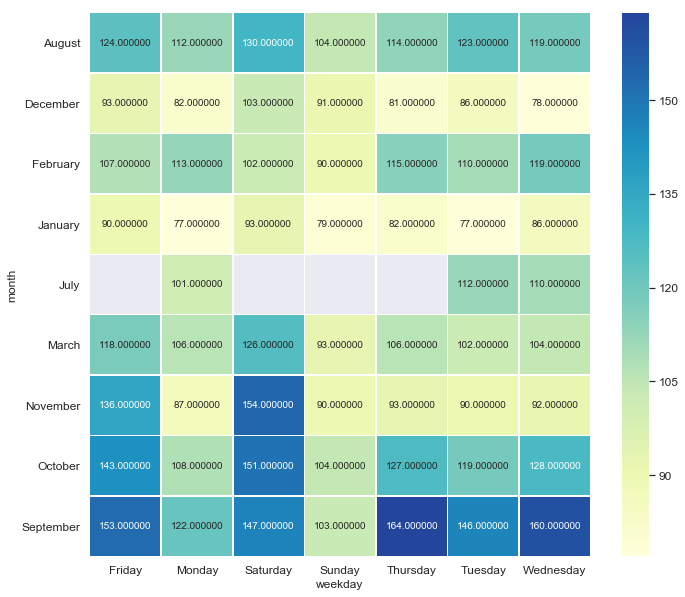

In [1390]:
df_crosstab = pd.crosstab(df_hotels['month'], df_hotels['weekday'], values=df_hotels['netPrice'], aggfunc='mean').round(0)
sns.heatmap(df_crosstab, annot=True, fmt='f', cmap='YlGnBu', cbar=True, linewidths=.5, \
                center=df_crosstab.loc['August','Saturday'])
# Rotate tick marks
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()

In [244]:
#sns.heatmap(df_hotels.corr())
#plt.show()

## Df grouped

In [249]:
df_grouped = (df_hotels.groupby(['checkIn', 'advance']).size().unstack().add_prefix('Advanced_'))
df_grouped = df_grouped.astype('Int64')
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230 entries, 2019-07-29 to 2020-03-14
Data columns (total 5 columns):
Advanced_7     146 non-null Int64
Advanced_14    146 non-null Int64
Advanced_30    146 non-null Int64
Advanced_60    146 non-null Int64
Advanced_90    146 non-null Int64
dtypes: Int64(5)
memory usage: 11.9 KB


### Checking missing files

In [124]:
advanced_7_null = df_grouped[df_grouped['Advanced_7'].isnull()]
advanced_7_null = advanced_7_null['2019-07-29':'2019-11-22']
print(advanced_7_null)

advance     Advanced_7  Advanced_14  Advanced_30  Advanced_60  Advanced_90
checkIn                                                                   
2019-09-07         NaN           63           57          NaN          NaN


In [125]:
advanced_14_null = df_grouped[df_grouped['Advanced_14'].isnull()]
advanced_14_null = advanced_14_null['2019-08-05':'2019-11-29']
print(advanced_14_null)

advance     Advanced_7  Advanced_14  Advanced_30  Advanced_60  Advanced_90
checkIn                                                                   
2019-09-14          33          NaN           67          NaN          NaN


In [126]:
advanced_30_null = df_grouped[df_grouped['Advanced_30'].isnull()]
advanced_30_null = advanced_30_null['2019-08-22':'2019-12-15']
print(advanced_30_null)

advance     Advanced_7  Advanced_14  Advanced_30  Advanced_60  Advanced_90
checkIn                                                                   
2019-09-30          59           58          NaN           85          NaN


In [127]:
advanced_60_null = df_grouped[df_grouped['Advanced_60'].isnull()]
advanced_60_null = advanced_60_null['2019-09-22':'2020-01-14']
print(advanced_60_null)

advance     Advanced_7  Advanced_14  Advanced_30  Advanced_60  Advanced_90
checkIn                                                                   
2019-10-30          47           43           42          NaN           85


In [128]:
advanced_90_null = df_grouped[df_grouped['Advanced_90'].isnull()]
advanced_90_null = advanced_90_null['2019-10-22':'2020-02-14']
print(advanced_90_null)

advance     Advanced_7  Advanced_14  Advanced_30  Advanced_60  Advanced_90
checkIn                                                                   
2019-11-29          77           72           36           37          NaN


As per these analysis, we have detected that file from 31th August 2019 is missing.

### Analysing number of hotels scraped per check-in date 

In [129]:
#df_hotels.query("checkIn=='2019-07-30' and advance==7")

In [250]:
#Renaming
df_grouped.rename(columns={'Advanced_7':'hotels_7','Advanced_14':'hotels_14',\
                           'Advanced_30':'hotels_30','Advanced_60':'hotels_60','Advanced_90':'hotels_90'}, inplace=True)

In [251]:
df_grouped.head(5)

advance,hotels_7,hotels_14,hotels_30,hotels_60,hotels_90
checkIn,,,,,
2019-07-29,36,NaN,NaN,NaN,NaN
2019-07-30,82,NaN,NaN,NaN,NaN
2019-07-31,78,NaN,NaN,NaN,NaN
2019-08-01,83,NaN,NaN,NaN,NaN
2019-08-02,76,NaN,NaN,NaN,NaN


In [252]:
df_grouped.describe()

advance,hotels_7,hotels_14,hotels_30,hotels_60,hotels_90
count,146.0000,146.0000,146.0000,146.0000,146.0000
mean,64.8767,64.8356,66.6164,68.8219,68.6849
std,21.4154,20.4241,19.2168,18.8243,21.3570
min,22.0000,18.0000,13.0000,15.0000,12.0000
25%,47.0000,47.0000,48.2500,49.0000,47.2500
50%,71.5000,71.0000,71.0000,76.5000,79.0000
75%,84.0000,83.0000,83.0000,84.0000,86.7500
max,95.0000,92.0000,94.0000,92.0000,94.0000


Mean of hotels downloaded per day:   
    7 days in advance: 62.83   
   14 days in advance: 63.07   
   30 days in advance: 64.62   
   60 days in advance: 66.52       
   90 days in advance: 66.84       

## Events

In [254]:
# Loading Events 2019-2020. Setting 'date' as index
df_events = pd.DataFrame()
df_events = pd.read_csv(".\\data\\EventsVLC.csv", sep=';', encoding='utf-8', header=0, na_values=['NA'], \
                    parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'), index_col='date')

In [255]:
df_events.tail()

,event,place,city,category,subcategory
date,,,,,
2020-03-16,Plantà Fallas,Valencia,Valencia,Fallas,NaN
2020-03-17,Día 1 Ofrenda Fallas,Valencia,Valencia,Fallas,NaN
2020-03-18,Día 2 Ofrenda Fallas,Valencia,Valencia,Fallas,NaN
2020-03-19,Cremà Fallas,Valencia,Valencia,Fallas,NaN
2020-03-19,San José,Valencia,Valencia,Festivity,Local


In [256]:
df_events['2019'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2019-08-01 to 2019-12-31
Data columns (total 5 columns):
event          155 non-null object
place          155 non-null object
city           155 non-null object
category       155 non-null object
subcategory    82 non-null object
dtypes: object(5)
memory usage: 7.3+ KB


In [257]:
df_events['2020'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-01-01 to 2020-03-19
Data columns (total 5 columns):
event          35 non-null object
place          35 non-null object
city           35 non-null object
category       35 non-null object
subcategory    8 non-null object
dtypes: object(5)
memory usage: 1.6+ KB


In [258]:
# Converting Category to categorical
df_events['category'] = df_events.category.astype('category')

In [259]:
print("Event Categories: {}".format(df_events.category.unique().tolist()))

Event Categories: ['Sports', 'Festivity', 'Music', 'Congress', 'Fair', 'Conference', 'Cinema', 'Fallas']


In [260]:
#df_events.loc[df_events['Date'] == '13/09/2019']
#eventsGrouped = df_events.groupby(['date','category']).count()['event']
#eventsGrouped

# unstack(): Pivoting a level of the row index (in this case the type of the expense) to the column axis
eventsGrouped = df_events.groupby(['date','category']).count()['event'].unstack()
eventsGrouped.fillna(0, inplace=True)
df_eventsGrouped = pd.DataFrame(eventsGrouped)
df_eventsGrouped.head(10)					

category,Cinema,Conference,Congress,Fair,Fallas,Festivity,Music,Sports
date,,,,,,,,
2019-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2019-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-08-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-08-24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-08-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-09-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-09-05,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2019-09-06,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2019-09-07,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0


In [261]:
# Resetting index of Events for merging
df_events.reset_index(inplace = True)

In [262]:
df_events.tail(5)

,date,event,place,city,category,subcategory
185,2020-03-16,Plantà Fallas,Valencia,Valencia,Fallas,NaN
186,2020-03-17,Día 1 Ofrenda Fallas,Valencia,Valencia,Fallas,NaN
187,2020-03-18,Día 2 Ofrenda Fallas,Valencia,Valencia,Fallas,NaN
188,2020-03-19,Cremà Fallas,Valencia,Valencia,Fallas,NaN
189,2020-03-19,San José,Valencia,Valencia,Festivity,Local


In [263]:
df_grouped_events = pd.merge(df_grouped, df_events, left_on='checkIn', right_on='date', how='left')

In [264]:
# Min values
df_grouped_events.loc[(df_grouped_events['hotels_7']==21) | (df_grouped_events['hotels_14']==17) | \
                      (df_grouped_events['hotels_30']==12)| (df_grouped_events['hotels_60']==14) | \
                      (df_grouped_events['hotels_90']==11)]

,hotels_7,hotels_14,hotels_30,hotels_60,hotels_90,date,event,place,city,category,subcategory


In [265]:
print(df_grouped.isnull().sum())

advance
hotels_7     84
hotels_14    84
hotels_30    84
hotels_60    84
hotels_90    84
dtype: int64


In [266]:
# Reset index
df_grouped.reset_index(inplace = True)

# Adding weekday and month 
df_grouped['weekday'] = df_grouped.checkIn.dt.weekday_name
df_grouped['month'] = df_grouped.checkIn.dt.strftime("%B")

# Casting weekday and month as categorical
df_grouped['weekday'] = df_grouped.weekday.astype('str')
df_grouped['month'] = df_grouped.month.astype('str')

In [267]:
#df_grouped.drop(columns=['files', 'sum'], inplace=True)

In [268]:
df_grouped.head(10)

advance,checkIn,hotels_7,hotels_14,hotels_30,hotels_60,hotels_90,weekday,month
0,2019-07-29,36,NaN,NaN,NaN,NaN,Monday,July
1,2019-07-30,82,NaN,NaN,NaN,NaN,Tuesday,July
2,2019-07-31,78,NaN,NaN,NaN,NaN,Wednesday,July
3,2019-08-01,83,NaN,NaN,NaN,NaN,Thursday,August
4,2019-08-02,76,NaN,NaN,NaN,NaN,Friday,August
5,2019-08-03,64,NaN,NaN,NaN,NaN,Saturday,August
6,2019-08-04,84,NaN,NaN,NaN,NaN,Sunday,August
7,2019-08-05,79,29,NaN,NaN,NaN,Monday,August
8,2019-08-06,76,76,NaN,NaN,NaN,Tuesday,August
9,2019-08-07,76,76,NaN,NaN,NaN,Wednesday,August


### Days with less or equal to 33% hotels found

In [269]:
NUM_HOTELS = round(TOT_HOTELS * (1/3), 2)

In [270]:
df_7_missing = df_grouped.loc[df_grouped['hotels_7']<=NUM_HOTELS]
df_7_events_min = pd.merge(df_7_missing, df_events, left_on='checkIn', right_on='date', how='left')
df_7_events_min = df_7_events_min[['checkIn','hotels_7','event','city','place','category','weekday','month']]
df_7_events_min

,checkIn,hotels_7,event,city,place,category,weekday,month
0,2019-09-13,22,Valencia Triatlón 2019,Valencia,Valencia,Sports,Friday,September
1,2019-09-19,24,XXVIII Dia Pilota Valenciana,Valencia,Valencia,Sports,Thursday,September
2,2019-09-19,24,Feria Hábitat Valencia,Valencia,Feria Valencia,Fair,Thursday,September
3,2019-09-25,22,BBVA Open Ciudad Valencia,Valencia,Club Tenis Valencia,Sports,Wednesday,September
4,2019-10-01,31,EcoFira+EfiAqua+IberFlora,Valencia,Feria Valencia,Fair,Tuesday,October
5,2019-10-01,31,9ª Semana Normas Verdes,Valencia,Palacio de Congresos,Congress,Tuesday,October
6,2019-10-05,26,Federación valenciana de Moros y Cristianos,Valencia,Valencia,Festivity,Saturday,October
7,2019-10-11,28,NaN,NaN,NaN,NaN,Friday,October
8,2019-10-12,28,Fiesta Nacional Española,Valencia,Valencia,Festivity,Saturday,October
9,2019-10-12,28,Concierto Pablo López,Valencia,Pabellón Fuente San Luís,Music,Saturday,October


In [271]:
print("Searching with 7 days in advance: {} days with {} or less hotels scraped".\
      format(pd.unique(df_7_events_min.checkIn).size, NUM_HOTELS))

Searching with 7 days in advance: 13 days with 31.33 or less hotels scraped


In [272]:
df_14_missing = df_grouped.loc[df_grouped['hotels_14']<=NUM_HOTELS]
df_14_events = pd.merge(df_14_missing, df_events, left_on='checkIn', right_on='date', how='left')
df_14_events = df_14_events[['checkIn','hotels_14','event','city','place','category','weekday','month']]
df_14_events

,checkIn,hotels_14,event,city,place,category,weekday,month
0,2019-08-05,29,NaN,NaN,NaN,NaN,Monday,August
1,2019-10-12,29,Fiesta Nacional Española,Valencia,Valencia,Festivity,Saturday,October
2,2019-10-12,29,Concierto Pablo López,Valencia,Pabellón Fuente San Luís,Music,Saturday,October
3,2019-10-18,24,Salón Internacional Franquicia+URBE,Valencia,Feria Valencia,Fair,Friday,October
4,2019-10-18,24,Concierto Paulo Londra,Valencia,Auditorio Marina Norte,Music,Friday,October
5,2019-10-18,24,EuroLeague: Valencia Basket-EFES Istanbul,Valencia,Pabellón Fuente San Luis,Sports,Friday,October
6,2019-10-19,22,Salón Internacional Franquicia+URBE,Valencia,Feria Valencia,Fair,Saturday,October
7,2019-10-19,22,Literatura y Musica Pop al Palau,Valencia,Palau de la Musica,Conference,Saturday,October
8,2019-10-25,29,R.Nac.Asoc.Española Hematología y Hemoterapia,Valencia,Palacio de Congresos,Congress,Friday,October
9,2019-10-26,30,R.Nac.Asoc.Española Hematología y Hemoterapia,Valencia,Palacio de Congresos,Congress,Saturday,October


In [273]:
print("Searching with 14 days in advance: {} days with {} or less hotels scraped".\
      format(pd.unique(df_14_events.checkIn).size, NUM_HOTELS))

Searching with 14 days in advance: 10 days with 31.33 or less hotels scraped


In [274]:
df_30_missing = df_grouped.loc[df_grouped['hotels_30']<=NUM_HOTELS]
df_30_events = pd.merge(df_30_missing, df_events, left_on='checkIn', right_on='date', how='left')
df_30_events = df_30_events[['checkIn','hotels_30','event','city','place','category','weekday','month']]
df_30_events

,checkIn,hotels_30,event,city,place,category,weekday,month
0,2019-10-25,21,R.Nac.Asoc.Española Hematología y Hemoterapia,Valencia,Palacio de Congresos,Congress,Friday,October
1,2019-10-26,31,R.Nac.Asoc.Española Hematología y Hemoterapia,Valencia,Palacio de Congresos,Congress,Saturday,October
2,2019-10-31,31,Congreso Nacional de Endodoncia,Valencia,Palacio de Congresos,Congress,Thursday,October
3,2019-11-16,18,"Concierto Dúo Dinámico ""Gira 60 Aniversario""",Valencia,Palau de les Arts Reina Sofía,Music,Saturday,November
4,2019-11-16,18,Dos Ruedas+VLC Bike,Valencia,Feria Valencia,Fair,Saturday,November
5,2019-11-16,18,Gran Premi Comunitat Valencia (calificación),Valencia,Circuit Ricardo Tormo,Sports,Saturday,November
6,2019-11-30,13,Cybercamp,Valencia,Palacio de Congresos,Fair,Saturday,November
7,2019-11-30,13,LaLiga: Valencia-Villareal (21h),Valencia,Estadio de Mestalla,Sports,Saturday,November


In [275]:
print("Searching with 30 days in advance: {} days with {} or less hotels scraped".\
      format(pd.unique(df_30_events.checkIn).size, NUM_HOTELS))

Searching with 30 days in advance: 5 days with 31.33 or less hotels scraped


In [276]:
df_60_missing = df_grouped.loc[df_grouped['hotels_60']<=NUM_HOTELS]
df_60_events = pd.merge(df_60_missing, df_events, left_on='checkIn', right_on='date', how='left')
df_60_events = df_60_events[['checkIn','hotels_60','event','city','place','category','weekday','month']]
df_60_events

,checkIn,hotels_60,event,city,place,category,weekday,month
0,2019-11-16,21,"Concierto Dúo Dinámico ""Gira 60 Aniversario""",Valencia,Palau de les Arts Reina Sofía,Music,Saturday,November
1,2019-11-16,21,Dos Ruedas+VLC Bike,Valencia,Feria Valencia,Fair,Saturday,November
2,2019-11-16,21,Gran Premi Comunitat Valencia (calificación),Valencia,Circuit Ricardo Tormo,Sports,Saturday,November
3,2019-11-30,15,Cybercamp,Valencia,Palacio de Congresos,Fair,Saturday,November
4,2019-11-30,15,LaLiga: Valencia-Villareal (21h),Valencia,Estadio de Mestalla,Sports,Saturday,November
5,2019-12-28,31,Gira Homenaje Mecano,Valencia,Palacio de Congresos,Music,Saturday,December


In [277]:
print("Searching with 60 days in advance: {} days with {} or less hotels scraped".\
      format(pd.unique(df_60_events.checkIn).size, NUM_HOTELS))

Searching with 60 days in advance: 3 days with 31.33 or less hotels scraped


In [278]:
df_90_missing = df_grouped.loc[df_grouped['hotels_90']<=NUM_HOTELS]
df_90_events = pd.merge(df_90_missing, df_events, left_on='checkIn', right_on='date', how='left')
df_90_events = df_90_events[['checkIn','hotels_90','event','city','place','category','weekday','month']]
df_90_events

,checkIn,hotels_90,event,city,place,category,weekday,month
0,2019-10-20,12,Feria Inmobiliaria del Mediterráneo (URBE),Valencia,Feria Valencia,Fair,Sunday,October
1,2019-10-20,12,"IV Acción Solidaria ""Valencia Contra el Cáncer""",Valencia,Valencia,Sports,Sunday,October
2,2019-11-16,28,"Concierto Dúo Dinámico ""Gira 60 Aniversario""",Valencia,Palau de les Arts Reina Sofía,Music,Saturday,November
3,2019-11-16,28,Dos Ruedas+VLC Bike,Valencia,Feria Valencia,Fair,Saturday,November
4,2019-11-16,28,Gran Premi Comunitat Valencia (calificación),Valencia,Circuit Ricardo Tormo,Sports,Saturday,November
5,2019-11-30,30,Cybercamp,Valencia,Palacio de Congresos,Fair,Saturday,November
6,2019-11-30,30,LaLiga: Valencia-Villareal (21h),Valencia,Estadio de Mestalla,Sports,Saturday,November
7,2019-12-31,31,Nochevieja 2019,Valencia,Valencia,Festivity,Tuesday,December


In [279]:
print("Searching with 90 days in advance: {} days with {} or less hotels scraped".\
      format(pd.unique(df_90_events.checkIn).size, NUM_HOTELS))

Searching with 90 days in advance: 4 days with 31.33 or less hotels scraped


### Days with more than to 80% hotels found

In [1207]:
NUM_HOTELS = round(TOT_HOTELS * 0.8, 0)

In [1208]:
df_7_nomiss = df_grouped.loc[df_grouped['hotels_7']>NUM_HOTELS]
df_7_events = pd.merge(df_7_nomiss, df_events, left_on='checkIn', right_on='date', how='left')
df_7_events = df_7_events[['checkIn','hotels_7','event','city','place','category','weekday','month']]
df_7_events

,checkIn,hotels_7,event,city,place,category,weekday,month
0,2019-07-30,81,NaN,NaN,NaN,NaN,Tuesday,July
1,2019-07-31,77,NaN,NaN,NaN,NaN,Wednesday,July
2,2019-08-01,82,Event01,Valencia,Mestalla,Sports,Thursday,August
3,2019-08-01,82,Event02,Valencia,Mestalla,Sports,Thursday,August
4,2019-08-02,75,NaN,NaN,NaN,NaN,Friday,August
5,2019-08-04,83,NaN,NaN,NaN,NaN,Sunday,August
6,2019-08-05,78,NaN,NaN,NaN,NaN,Monday,August
7,2019-08-06,75,NaN,NaN,NaN,NaN,Tuesday,August
8,2019-08-07,75,NaN,NaN,NaN,NaN,Wednesday,August
9,2019-08-08,78,NaN,NaN,NaN,NaN,Thursday,August


In [1357]:
days_fit = pd.unique(df_7_events.checkIn).size
days_no_event = df_7_events[df_7_events['event'].isnull()].shape[0]
print("Searching with 7 days in advance: \n {} days with more than {} hotels scraped (from {} hotels)".\
      format(days_fit, NUM_HOTELS, TOT_HOTELS))
print(" {} days without events ({}%)".format(days_no_event, round((days_no_event/days_fit)*100,2)))
print(" Days of the week involved:{}".format(df_7_events.weekday.unique().tolist()))

Searching with 7 days in advance: 
 47 days with more than 73.0 hotels scraped (from 91 hotels)
 27 days without events (57.45%)
 Days of the week involved:['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday']


In [1358]:
df_14_nomiss = df_grouped.loc[df_grouped['hotels_14']>NUM_HOTELS]
df_14_events = pd.merge(df_14_nomiss, df_events, left_on='checkIn', right_on='date', how='left')
df_14_events = df_14_events[['checkIn','hotels_14','event','city','place','category','weekday','month']]
df_14_events

,checkIn,hotels_14,event,city,place,category,weekday,month
0,2019-08-06,75,NaN,NaN,NaN,NaN,Tuesday,August
1,2019-08-07,75,NaN,NaN,NaN,NaN,Wednesday,August
2,2019-08-08,78,NaN,NaN,NaN,NaN,Thursday,August
3,2019-08-11,82,NaN,NaN,NaN,NaN,Sunday,August
4,2019-08-12,77,NaN,NaN,NaN,NaN,Monday,August
5,2019-08-13,79,NaN,NaN,NaN,NaN,Tuesday,August
6,2019-08-14,76,NaN,NaN,NaN,NaN,Wednesday,August
7,2019-08-18,82,NaN,NaN,NaN,NaN,Sunday,August
8,2019-08-19,79,NaN,NaN,NaN,NaN,Monday,August
9,2019-08-20,80,NaN,NaN,NaN,NaN,Tuesday,August


In [1359]:
days_fit = pd.unique(df_14_events.checkIn).size
days_no_event = df_14_events[df_14_events['event'].isnull()].shape[0]
print("Searching with 14 days in advance: \n {} days with more than {} hotels scraped (from {} hotels)".\
      format(days_fit, NUM_HOTELS, TOT_HOTELS))
print(" {} days without events ({}%)".format(days_no_event, round((days_no_event/days_fit)*100,2)))
print(" Days of the week involved:{}".format(df_14_events.weekday.unique().tolist()))

Searching with 14 days in advance: 
 44 days with more than 73.0 hotels scraped (from 91 hotels)
 29 days without events (65.91%)
 Days of the week involved:['Tuesday', 'Wednesday', 'Thursday', 'Sunday', 'Monday', 'Friday']


In [1360]:
df_30_nomiss = df_grouped.loc[df_grouped['hotels_30']>NUM_HOTELS]
df_30_events = pd.merge(df_30_nomiss, df_events, left_on='checkIn', right_on='date', how='left')
df_30_events = df_30_events[['checkIn','hotels_30','event','city','place','category','weekday','month']]
df_30_events

,checkIn,hotels_30,event,city,place,category,weekday,month
0,2019-08-22,78,NaN,NaN,NaN,NaN,Thursday,August
1,2019-08-23,75,NaN,NaN,NaN,NaN,Friday,August
2,2019-08-25,80,NaN,NaN,NaN,NaN,Sunday,August
3,2019-08-26,80,NaN,NaN,NaN,NaN,Monday,August
4,2019-08-29,83,NaN,NaN,NaN,NaN,Thursday,August
5,2019-09-01,83,NaN,NaN,NaN,NaN,Sunday,September
6,2019-09-02,82,NaN,NaN,NaN,NaN,Monday,September
7,2019-09-03,77,NaN,NaN,NaN,NaN,Tuesday,September
8,2019-09-08,81,Musica a la Mar: Banda Simfònica del Marítim,Valencia,Playa de las Arenas,Music,Sunday,September
9,2019-09-09,81,NaN,NaN,NaN,NaN,Monday,September


In [1361]:
days_fit = pd.unique(df_30_events.checkIn).size
days_no_event = df_30_events[df_30_events['event'].isnull()].shape[0]
print("Searching with 30 days in advance: \n {} days with more than {} hotels scraped (from {} hotels)".\
      format(days_fit, NUM_HOTELS, TOT_HOTELS))
print(" {} days without events ({}%)".format(days_no_event, round((days_no_event/days_fit)*100,2)))
print(" Days of the week involved:{}".format(df_30_events.weekday.unique().tolist()))

Searching with 30 days in advance: 
 43 days with more than 73.0 hotels scraped (from 91 hotels)
 27 days without events (62.79%)
 Days of the week involved:['Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Saturday']


In [1362]:
df_60_nomiss = df_grouped.loc[df_grouped['hotels_60']>NUM_HOTELS]
df_60_events = pd.merge(df_60_nomiss, df_events, left_on='checkIn', right_on='date', how='left')
df_60_events = df_60_events[['checkIn','hotels_60','event','city','place','category','weekday','month']]
df_60_events

,checkIn,hotels_60,event,city,place,category,weekday,month
0,2019-09-22,82,Campeonato España Ciclismo Pista,Valencia,Palau Velòdrom Lluís Puig,Sports,Sunday,September
1,2019-09-22,82,XXVIII Dia Pilota Valenciana,Valencia,Valencia,Sports,Sunday,September
2,2019-09-22,82,IV Feria del Vermout,Valencia,Mercado de Tapineria,Fair,Sunday,September
3,2019-09-23,80,BBVA Open Ciudad Valencia,Valencia,Club Tenis Valencia,Sports,Monday,September
4,2019-09-24,80,BBVA Open Ciudad Valencia,Valencia,Club Tenis Valencia,Sports,Tuesday,September
5,2019-09-24,80,Concierto Quinteto Casulana,Valencia,Palau de la Musica,Music,Tuesday,September
6,2019-09-25,77,BBVA Open Ciudad Valencia,Valencia,Club Tenis Valencia,Sports,Wednesday,September
7,2019-09-26,77,BBVA Open Ciudad Valencia,Valencia,Club Tenis Valencia,Sports,Thursday,September
8,2019-09-27,75,BBVA Open Ciudad Valencia,Valencia,Club Tenis Valencia,Sports,Friday,September
9,2019-09-27,75,Concierto Melendi,Valencia,Plaza de Toros,Music,Friday,September


In [1363]:
days_fit = pd.unique(df_60_events.checkIn).size
days_no_event = df_60_events[df_60_events['event'].isnull()].shape[0]
print("Searching with 60 days in advance: \n {} days with more than {} hotels scraped (from {} hotels)".\
      format(days_fit, NUM_HOTELS, TOT_HOTELS))
print(" {} days without events ({}%)".format(days_no_event, round((days_no_event/days_fit)*100,2)))
print(" Days of the week involved:{}".format(df_60_events.weekday.unique().tolist()))

Searching with 60 days in advance: 
 59 days with more than 73.0 hotels scraped (from 91 hotels)
 28 days without events (47.46%)
 Days of the week involved:['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


In [1364]:
df_90_nomiss = df_grouped.loc[df_grouped['hotels_90']>NUM_HOTELS]
df_90_events = pd.merge(df_90_nomiss, df_events, left_on='checkIn', right_on='date', how='left')
df_90_events = df_90_events[['checkIn','hotels_90','event','city','place','category','weekday','month']]
df_90_events

,checkIn,hotels_90,event,city,place,category,weekday,month
0,2019-10-21,84,NaN,NaN,NaN,NaN,Monday,October
1,2019-10-22,85,NaN,NaN,NaN,NaN,Tuesday,October
2,2019-10-23,83,NaN,NaN,NaN,NaN,Wednesday,October
3,2019-10-24,77,Mostra de València-Cinema del Mediterrani,Valencia,Teatre Principal,Cinema,Thursday,October
4,2019-10-24,77,R.Nac.Asoc.Española Hematología y Hemoterapia,Valencia,Palacio de Congresos,Congress,Thursday,October
5,2019-10-27,77,Medio Maratón Trinidad Alfonso EDP 2019,Valencia,Valencia,Sports,Sunday,October
6,2019-10-28,85,NaN,NaN,NaN,NaN,Monday,October
7,2019-10-29,84,NaN,NaN,NaN,NaN,Tuesday,October
8,2019-10-30,85,Valencia Boat Show,Valencia,La Marina de Valencia,Fair,Wednesday,October
9,2019-10-31,82,Congreso Nacional de Endodoncia,Valencia,Palacio de Congresos,Congress,Thursday,October


In [1365]:
days_fit = pd.unique(df_90_events.checkIn).size
days_no_event = df_90_events[df_90_events['event'].isnull()].shape[0]
print("Searching with 90 days in advance: \n {} days with more than {} hotels scraped (from {} hotels)".\
      format(days_fit, NUM_HOTELS, TOT_HOTELS))
print(" {} days without events ({}%)".format(days_no_event, round((days_no_event/days_fit)*100,2)))
print(" Days of the week involved:{}".format(df_90_events.weekday.unique().tolist()))

Searching with 90 days in advance: 
 62 days with more than 73.0 hotels scraped (from 91 hotels)
 33 days without events (53.23%)
 Days of the week involved:['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday', 'Friday', 'Saturday']


### Mean num hotels in a unique series

In [280]:
df_all = df_grouped.copy()

In [281]:
df_all.head(5)

advance,checkIn,hotels_7,hotels_14,hotels_30,hotels_60,hotels_90,weekday,month
0,2019-07-29,36,NaN,NaN,NaN,NaN,Monday,July
1,2019-07-30,82,NaN,NaN,NaN,NaN,Tuesday,July
2,2019-07-31,78,NaN,NaN,NaN,NaN,Wednesday,July
3,2019-08-01,83,NaN,NaN,NaN,NaN,Thursday,August
4,2019-08-02,76,NaN,NaN,NaN,NaN,Friday,August


In [282]:
def calculate_mean(row):
    return row['sum'] / row['files']

df_all['sum'] = df_all.sum(axis = 1, skipna = True)
df_all['files'] = df_all[['hotels_7','hotels_14','hotels_30','hotels_60','hotels_90']].apply(lambda x: x.count(), axis=1)
df_all['mean'] = df_all.apply(calculate_mean, axis=1)

In [283]:
df_all.query("files==3").head(10)

advance,checkIn,hotels_7,hotels_14,hotels_30,hotels_60,hotels_90,weekday,month,sum,files,mean
23,2019-08-21,75,79,48,NaN,NaN,Wednesday,August,202.0,3,67.3333
24,2019-08-22,78,78,79,NaN,NaN,Thursday,August,235.0,3,78.3333
25,2019-08-23,76,76,76,NaN,NaN,Friday,August,228.0,3,76.0000
26,2019-08-24,70,70,70,NaN,NaN,Saturday,August,210.0,3,70.0000
27,2019-08-25,84,85,81,NaN,NaN,Sunday,August,250.0,3,83.3333
28,2019-08-26,84,83,81,NaN,NaN,Monday,August,248.0,3,82.6667
29,2019-08-27,69,75,72,NaN,NaN,Tuesday,August,216.0,3,72.0000
30,2019-08-28,73,74,71,NaN,NaN,Wednesday,August,218.0,3,72.6667
31,2019-08-29,84,82,84,NaN,NaN,Thursday,August,250.0,3,83.3333
32,2019-08-30,81,80,74,NaN,NaN,Friday,August,235.0,3,78.3333


In [284]:
df_all = pd.merge(df_all, df_events, left_on='checkIn', right_on='date', how='left')

In [285]:
df_all.tail(5)

,checkIn,hotels_7,hotels_14,hotels_30,hotels_60,hotels_90,weekday,month,sum,files,mean,date,event,place,city,category,subcategory
292,2020-03-10,NaN,NaN,NaN,NaN,84,Tuesday,March,84.0,1,84.0,2020-03-10,DV3 World 2020,Palacio de Congresos,Valencia,Congress,NaN
293,2020-03-11,NaN,NaN,NaN,NaN,86,Wednesday,March,86.0,1,86.0,2020-03-11,DV3 World 2020,Palacio de Congresos,Valencia,Congress,NaN
294,2020-03-12,NaN,NaN,NaN,NaN,87,Thursday,March,87.0,1,87.0,NaT,NaN,NaN,NaN,NaN,NaN
295,2020-03-13,NaN,NaN,NaN,NaN,69,Friday,March,69.0,1,69.0,NaT,NaN,NaN,NaN,NaN,NaN
296,2020-03-14,NaN,NaN,NaN,NaN,49,Saturday,March,49.0,1,49.0,2020-03-14,Mascletà inicio Fallas,Plaza del Ayuntamiento,Valencia,Fallas,NaN


In [286]:
df_all_events = df_all[['checkIn','mean','files','event','city','place','category','weekday','month']]

In [287]:
df_all_events.query("mean<=30")

,checkIn,mean,files,event,city,place,category,weekday,month
159,2019-11-16,24.8,5,"Concierto Dúo Dinámico ""Gira 60 Aniversario""",Valencia,Palau de les Arts Reina Sofía,Music,Saturday,November
160,2019-11-16,24.8,5,Dos Ruedas+VLC Bike,Valencia,Feria Valencia,Fair,Saturday,November
161,2019-11-16,24.8,5,Gran Premi Comunitat Valencia (calificación),Valencia,Circuit Ricardo Tormo,Sports,Saturday,November
184,2019-11-30,20.8,5,Cybercamp,Valencia,Palacio de Congresos,Fair,Saturday,November
185,2019-11-30,20.8,5,LaLiga: Valencia-Villareal (21h),Valencia,Estadio de Mestalla,Sports,Saturday,November


In [1217]:
df_all_events.query("mean>=80")

,checkIn,mean,files,event,city,place,category,weekday,month
1,2019-07-30,81.0000,1,NaN,NaN,NaN,NaN,Tuesday,July
3,2019-08-01,82.0000,1,Event01,Valencia,Mestalla,Sports,Thursday,August
4,2019-08-01,82.0000,1,Event02,Valencia,Mestalla,Sports,Thursday,August
7,2019-08-04,83.0000,1,NaN,NaN,NaN,NaN,Sunday,August
14,2019-08-11,80.0000,2,NaN,NaN,NaN,NaN,Sunday,August
21,2019-08-18,81.5000,2,NaN,NaN,NaN,NaN,Sunday,August
28,2019-08-25,82.3333,3,NaN,NaN,NaN,NaN,Sunday,August
29,2019-08-26,81.6667,3,NaN,NaN,NaN,NaN,Monday,August
32,2019-08-29,82.3333,3,NaN,NaN,NaN,NaN,Thursday,August
35,2019-09-01,85.0000,3,NaN,NaN,NaN,NaN,Sunday,September


### Mean price per hotel

In [288]:
df_mean_price = df_hotels[['name','netPrice']]
df_mean_price = df_mean_price.groupby('name').mean()

In [289]:
df_mean_price.query("netPrice < 60")

,netPrice
name,
Hotel Villacarlos,57.8211
Lindala,59.3872
Valencia Suits You Citytel,58.5505
You & Co. Saler Beach Boutique,59.8012


In [290]:
df_mean_price.query("netPrice > 200")

,netPrice
name,
Caro Hotel,249.5939
Las Arenas Balneario Resort,214.7078
The Westin Valencia,237.9620


In [291]:
df_mean_price = df_hotels[['weekday','netPrice']]
df_mean_price = df_mean_price.groupby('weekday').mean()
df_mean_price

,netPrice
weekday,
Friday,122.9296
Monday,98.9145
Saturday,130.1067
Sunday,95.5332
Thursday,109.2211
Tuesday,106.4144
Wednesday,108.9201


### Prices when missing hotels > 66%

In [1319]:
df_hotels.head(5)

,name,propertyId,checkIn,stars,score,advance,propertyType,district,longitude,latitude,netPrice,weekday,month
1524,Sol Playa,12656,2019-07-30,2 star,8.3,7,Hotel,Poblados marítimos,-0.3238,39.4651,85.0,Tuesday,July
3508,Sol Playa,12656,2019-07-31,2 star,8.3,7,Hotel,Poblados marítimos,-0.3238,39.4651,85.0,Wednesday,July
5419,Sol Playa,12656,2019-08-01,2 star,8.3,7,Hotel,Poblados marítimos,-0.3238,39.4651,103.0,Thursday,August
10596,Sol Playa,12656,2019-08-04,2 star,8.3,7,Hotel,Poblados marítimos,-0.3238,39.4651,94.0,Sunday,August
5656,Sol Playa,12656,2019-08-08,2 star,8.3,14,Hotel,Poblados marítimos,-0.3238,39.4651,160.0,Thursday,August


In [292]:
df_mean_price = df_hotels[['checkIn','netPrice']]

In [293]:
df_mean_price.head(5)

,checkIn,netPrice
1524,2019-07-30,85.0
3508,2019-07-31,85.0
5419,2019-08-01,103.0
10596,2019-08-04,94.0
5656,2019-08-08,160.0


In [294]:
df_mean_price.shape

(48740, 2)

In [295]:
df_mean_price = df_mean_price.groupby('checkIn').mean()

In [296]:
df_mean_price.shape

(230, 1)

In [297]:
df_7_missing_meanPrices = pd.merge(df_7_missing, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')
df_14_missing_meanPrices = pd.merge(df_14_missing, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')
df_30_missing_meanPrices = pd.merge(df_30_missing, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')
df_60_missing_meanPrices = pd.merge(df_60_missing, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')
df_90_missing_meanPrices = pd.merge(df_90_missing, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')

In [298]:
df_7_missing_meanPrices = df_7_missing_meanPrices[['checkIn','netPrice','weekday','month']]
df_14_missing_meanPrices = df_14_missing_meanPrices[['checkIn','netPrice','weekday','month']]
df_30_missing_meanPrices = df_30_missing_meanPrices[['checkIn','netPrice','weekday','month']]
df_60_missing_meanPrices = df_60_missing_meanPrices[['checkIn','netPrice','weekday','month']]
df_90_missing_meanPrices = df_90_missing_meanPrices[['checkIn','netPrice','weekday','month']]

In [299]:
df_7_missing_meanPrices

,checkIn,netPrice,weekday,month
0,2019-09-13,134.2658,Friday,September
1,2019-09-19,199.6087,Thursday,September
2,2019-09-25,146.0214,Wednesday,September
3,2019-10-01,153.0351,Tuesday,October
4,2019-10-05,143.2759,Saturday,October
5,2019-10-11,144.0882,Friday,October
6,2019-10-12,152.7258,Saturday,October
7,2019-10-23,131.3581,Wednesday,October
8,2019-10-24,133.1846,Thursday,October
9,2019-10-26,176.5263,Saturday,October


In [300]:
desc_price_7 = df_7_missing_meanPrices['netPrice'].describe()
desc_price_14 = df_14_missing_meanPrices['netPrice'].describe()
desc_price_30 = df_30_missing_meanPrices['netPrice'].describe()
desc_price_60 = df_60_missing_meanPrices['netPrice'].describe()
desc_price_90 = df_90_missing_meanPrices['netPrice'].describe()

desc_frame = {'Advance_7':desc_price_7, 'Advance_14':desc_price_14, 'Advance_30':desc_price_30, \
         'Advance_60':desc_price_60, 'Advance_90':desc_price_90}
df_result = pd.DataFrame(desc_frame)  
print(df_result)

       Advance_7  Advance_14  Advance_30  Advance_60  Advance_90
count    13.0000     10.0000      5.0000      3.0000      4.0000
mean    173.0797    172.7912    210.3710    245.1810    218.0428
std      61.0258     71.2623     88.1129    100.7420    102.6287
min     129.3024    115.5068    111.3875    128.9000     97.4644
25%     134.2658    131.1129    157.2981    214.6971    150.4140
50%     146.0214    144.9158    176.5263    300.4943    234.2790
75%     176.5263    171.7193    300.4943    303.3215    301.9079
max     306.1488    306.1488    306.1488    306.1488    306.1488


### Prices when missing hotels < 20%

In [301]:
df_7_nomissing_meanPrices = pd.merge(df_7_nomiss, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')
df_14_nomissing_meanPrices = pd.merge(df_14_nomiss, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')
df_30_nomissing_meanPrices = pd.merge(df_30_nomiss, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')
df_60_nomissing_meanPrices = pd.merge(df_60_nomiss, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')
df_90_nomissing_meanPrices = pd.merge(df_90_nomiss, df_mean_price, left_on='checkIn', right_on='checkIn', how='left')

NameError: name 'df_7_nomiss' is not defined

In [1367]:
desc_price_7 = df_7_nomissing_meanPrices['netPrice'].describe()
desc_price_14 = df_14_nomissing_meanPrices['netPrice'].describe()
desc_price_30 = df_30_nomissing_meanPrices['netPrice'].describe()
desc_price_60 = df_60_nomissing_meanPrices['netPrice'].describe()
desc_price_90 = df_90_nomissing_meanPrices['netPrice'].describe()

desc_frame = {'Advance_7':desc_price_7, 'Advance_14':desc_price_14, 'Advance_30':desc_price_30, \
         'Advance_60':desc_price_60, 'Advance_90':desc_price_90}
df_result = pd.DataFrame(desc_frame)  
print(df_result)

       Advance_7  Advance_14  Advance_30  Advance_60  Advance_90
count    47.0000     44.0000     43.0000     59.0000     62.0000
mean    106.4645    106.4823     98.8509    104.9665     93.8632
std      15.1718     17.6284     21.1833     24.6392     14.5581
min      78.0904     76.8395     74.8622     73.1333     70.7442
25%      95.4301     91.2618     79.5518     81.6862     82.8869
50%     107.2357    108.4448     97.0115    104.5090     89.8035
75%     116.5195    119.8423    110.8494    120.8373    104.4830
max     145.8408    153.9591    153.9591    167.8599    132.9255


In [107]:
df_hotels.shape

(42480, 13)

In [108]:
df_hotels.advance.unique().tolist()

[7, 14, 30, 60, 90]

In [1402]:
# Loading Events 2019-2020. Setting 'date' as index
df_events = pd.DataFrame()
df_events = pd.read_csv(".\\data\\EventsVLC.csv", sep=';', encoding='utf-8', header=0, na_values=['NA'], \
                    parse_dates=['date'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'), index_col='date')

In [1403]:
df_events.tail()

,event,place,city,category,subcategory
date,,,,,
2020-03-16,Plantà Fallas,Valencia,Valencia,Fallas,NaN
2020-03-17,Día 1 Ofrenda Fallas,Valencia,Valencia,Fallas,NaN
2020-03-18,Día 2 Ofrenda Fallas,Valencia,Valencia,Fallas,NaN
2020-03-19,Cremà Fallas,Valencia,Valencia,Fallas,NaN
2020-03-19,San José,Valencia,Valencia,Festivity,Local


In [1404]:
df_events['2019'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2019-08-01 to 2019-12-31
Data columns (total 5 columns):
event          155 non-null object
place          155 non-null object
city           155 non-null object
category       155 non-null object
subcategory    82 non-null object
dtypes: object(5)
memory usage: 7.3+ KB


In [1405]:
df_events['2020'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2020-01-01 to 2020-03-19
Data columns (total 5 columns):
event          35 non-null object
place          35 non-null object
city           35 non-null object
category       35 non-null object
subcategory    8 non-null object
dtypes: object(5)
memory usage: 1.6+ KB


153 events on 2019 (since 01/08/2019) and 35 events on 2020 (until 19/03/2020)	

In [1406]:
# Converting Category to categorical
df_events['category'] = df_events.category.astype('category')

In [1407]:
print("Event Categories: {}".format(df_events.category.unique().tolist()))

Event Categories: ['Sports', 'Festivity', 'Music', 'Congress', 'Fair', 'Conference', 'Cinema', 'Fallas']


In [265]:
#df_events.loc[df_events['Date'] == '13/09/2019']
#eventsGrouped = df_events.groupby(['date','category']).count()['event']
#eventsGrouped

# unstack(): Pivoting a level of the row index (in this case the type of the expense) to the column axis
eventsGrouped = df_events.groupby(['date','category']).count()['event'].unstack()
eventsGrouped.fillna(0, inplace=True)
df_eventsGrouped = pd.DataFrame(eventsGrouped)
df_eventsGrouped.head(10)

category,Cinema,Conference,Congress,Fair,Fallas,Festivity,Music,Sports
date,,,,,,,,
2019-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-08-15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019-08-24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-08-31,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-09-04,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2019-09-05,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0
2019-09-06,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2019-09-07,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0


# K neighbours

In [302]:
df = pd.merge(df_hotels, df_events, left_on='checkIn', right_on='date', how='left')
# Drop duplicates due to one day may have several events
df.drop_duplicates(keep='first', inplace=True)
df.shape

(64277, 17)

In [303]:
df['hasEvent'] = df['event'].notnull()
df_attr = df[['stars','score','advance','weekday','netPrice','hasEvent']]
df_attr.head(5)

,stars,score,advance,weekday,netPrice,hasEvent
0,2 star,8.3,7,Tuesday,85.0,False
1,2 star,8.3,7,Wednesday,85.0,False
2,2 star,8.3,7,Thursday,103.0,True
3,2 star,8.3,7,Thursday,103.0,True
4,2 star,8.3,7,Sunday,94.0,False


In [304]:
print(df_attr.isnull().sum())

stars          0
score        638
advance        0
weekday        0
netPrice    3935
hasEvent       0
dtype: int64


In [305]:
df_attr = df_attr.dropna()
df_attr.loc[df_attr['netPrice'].isnull()]

,stars,score,advance,weekday,netPrice,hasEvent


In [306]:
df_labels = df_attr['hasEvent']

In [307]:
print("Dimension vector attributes: {}".format(df_attr.shape))
print("Dimension vector labels: {}".format(df_labels.shape))

Dimension vector attributes: (59746, 6)
Dimension vector labels: (59746,)


In [308]:
#ONEHOT ENCODING BLOCK
df_attr = pd.get_dummies(df_attr, columns=['stars','weekday'])
df_attr.head(5)

,score,advance,netPrice,hasEvent,stars_1 star,stars_2 star,stars_3 star,stars_4 star,stars_5 star,stars_Non star,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,8.3,7,85.0,False,0,1,0,0,0,0,0,0,0,0,0,1,0
1,8.3,7,85.0,False,0,1,0,0,0,0,0,0,0,0,0,0,1
2,8.3,7,103.0,True,0,1,0,0,0,0,0,0,0,0,1,0,0
3,8.3,7,103.0,True,0,1,0,0,0,0,0,0,0,0,1,0,0
4,8.3,7,94.0,False,0,1,0,0,0,0,0,0,0,1,0,0,0


In [309]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#df_attr['stars'] = labelencoder.fit_transform(df_attr['stars'])
#df_attr['weekday'] = labelencoder.fit_transform(df_attr['weekday'])
#df_attr

In [310]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59746 entries, 0 to 64524
Data columns (total 17 columns):
score                59746 non-null float64
advance              59746 non-null int64
netPrice             59746 non-null float32
hasEvent             59746 non-null bool
stars_1 star         59746 non-null uint8
stars_2 star         59746 non-null uint8
stars_3 star         59746 non-null uint8
stars_4 star         59746 non-null uint8
stars_5 star         59746 non-null uint8
stars_Non star       59746 non-null uint8
weekday_Friday       59746 non-null uint8
weekday_Monday       59746 non-null uint8
weekday_Saturday     59746 non-null uint8
weekday_Sunday       59746 non-null uint8
weekday_Thursday     59746 non-null uint8
weekday_Tuesday      59746 non-null uint8
weekday_Wednesday    59746 non-null uint8
dtypes: bool(1), float32(1), float64(1), int64(1), uint8(13)
memory usage: 2.4 MB


In [346]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_attr, df_labels, test_size=0.2, random_state=2017, \
                                                    stratify=df_labels)

In [347]:
print("Number of prices to train: {}".format(X_train.shape[0]))
print("Number of prices to test: {}".format(X_test.shape[0]))

Number of prices to train: 47796
Number of prices to test: 11950


In [313]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from time import time

clf = KNeighborsClassifier()
            
param_grid = {"n_neighbors": range(1, 11), "weights": ["uniform", "distance"]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=4)

start = time()
grid_search.fit(X_train, y_train)
end = time()

print("Searching time: {}minutes".format((end - start)/60))

La cerca ha trigat 202.67852878570557 segons


In [316]:
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']
ranks = grid_search.cv_results_['rank_test_score']

for rank, mean, std, pms in zip(ranks, means, stds, params):
    print("{}) Mean precision: {:.2f} +/- {:.2f} with parameters {}".format(rank, mean*100, std*100, pms))

10) Mean precision: 92.75 +/- 0.25 with parameters {'n_neighbors': 1, 'weights': 'uniform'}
10) Mean precision: 92.75 +/- 0.25 with parameters {'n_neighbors': 1, 'weights': 'distance'}
20) Mean precision: 90.73 +/- 0.31 with parameters {'n_neighbors': 2, 'weights': 'uniform'}
9) Mean precision: 92.85 +/- 0.28 with parameters {'n_neighbors': 2, 'weights': 'distance'}
18) Mean precision: 91.11 +/- 0.43 with parameters {'n_neighbors': 3, 'weights': 'uniform'}
7) Mean precision: 93.74 +/- 0.36 with parameters {'n_neighbors': 3, 'weights': 'distance'}
17) Mean precision: 91.27 +/- 0.42 with parameters {'n_neighbors': 4, 'weights': 'uniform'}
8) Mean precision: 93.68 +/- 0.29 with parameters {'n_neighbors': 4, 'weights': 'distance'}
19) Mean precision: 91.07 +/- 0.28 with parameters {'n_neighbors': 5, 'weights': 'uniform'}
5) Mean precision: 94.07 +/- 0.26 with parameters {'n_neighbors': 5, 'weights': 'distance'}
14) Mean precision: 91.74 +/- 0.43 with parameters {'n_neighbors': 6, 'weights'

In [342]:
print("Best value for 'k': {}".format(grid_search.best_params_["n_neighbors"]))
print("Best value for weights: {}".format(grid_search.best_params_["weights"]))

Best value for 'k': 10
Best value for weights: distance


In [341]:
y_test = [True, False, True, False, False, False, False, False, False, True, False]
y_test = np.asarray(y_test)
y_pred = [True, False, True, False, False, False, False, True, True, False, True]
y_pred = np.asarray(y_pred)
accuracy = np.true_divide(np.sum(y_pred == y_test), y_pred.shape[0])*100
print("Precision on test dataset: {:.2f}%".format(accuracy))
accuracy = precision_score(y_test, y_pred, average='micro') * 100
print("Precision on test dataset with average='micro': {:.2f}%".format(accuracy))

Precision on test dataset: 63.64%
Precision on test dataset with average='micro': 63.64%


In [348]:
clf = KNeighborsClassifier(n_neighbors = grid_search.best_params_["n_neighbors"], \
                           weights = grid_search.best_params_["weights"])

#start = time()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#start = time()
#print("Fit and prediction time: {}seconds".format(end - start))

In [349]:
accuracy = np.true_divide(np.sum(y_pred == y_test), y_pred.shape[0])*100
print("Precision on test dataset: {:.2f}%".format(accuracy))

Precision on test dataset: 95.21%


In [353]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score
from sklearn.datasets import make_classification

In [355]:
# micro: Calculate metrics globally by counting the total true positives, false negatives and false positives.
accuracy = precision_score(y_test, y_pred, average='micro') * 100
print("Precision score on test dataset with average='micro': {:.2f}%".format(accuracy)) 

accuracy = recall_score(y_test, y_pred, average='micro') * 100
print("Recall score on test dataset with average='micro': {:.2f}%".format(accuracy)) 

accuracy = f1_score(y_test, y_pred, average='micro') * 100
print("F1 score on test dataset with average='micro': {:.2f}%".format(accuracy)) 

Precision score on test dataset with average='micro': 95.21%
Recall score on test dataset with average='micro': 95.21%
F1 score on test dataset with average='micro': 95.21%


In [351]:
accuracy = precision_score(y_test, y_pred, average='macro') * 100
print("Precision on test dataset with average='macro': {:.2f}%".format(accuracy))

Precision on test dataset with average='macro': 95.87%


In [352]:
accuracy = precision_score(y_test, y_pred, average='weighted') * 100
print("Precision on test dataset with average='weighted': {:.2f}%".format(accuracy))

Precision on test dataset with average='weighted': 95.32%


In [ ]:
#from sklearn.cross_validation import StratifiedShuffleSplit
import sklearn.cross_validation
from sklearn.metrics import classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
X, y = make_classification(n_samples=100, n_informative=10, n_classes=3)
sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.5, random_state=0)
for train_idx, test_idx in sss:
    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f1_score(y_test, y_pred, average="micro"))
    print(precision_score(y_test, y_pred, average="micro"))
    print(recall_score(y_test, y_pred, average="micro")) 

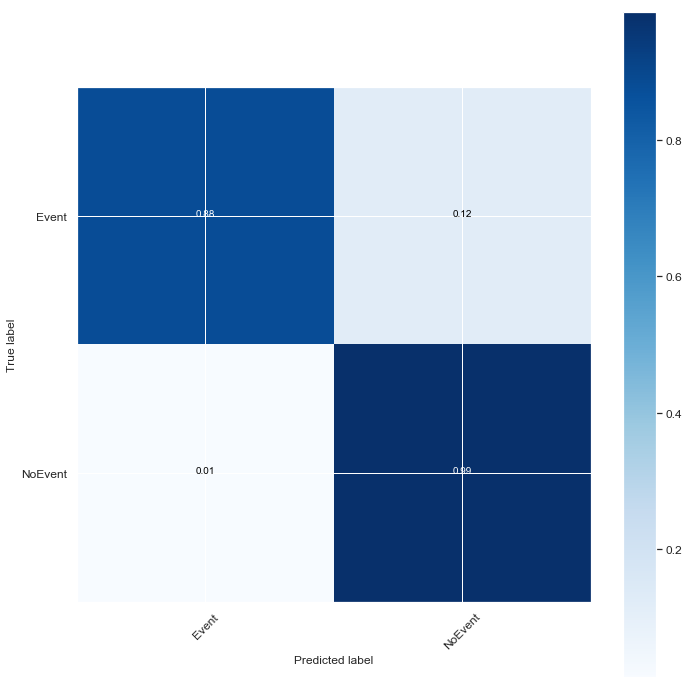

In [1526]:
n_classes = 2
labels_text = ["Event", "NoEvent"]

import itertools
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, preds)

def plot_confusion_matrix(cm, classes):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    cmap=plt.cm.Blues

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], ".2f"),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cnf_matrix, classes=labels_text)

In [1527]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from scipy.stats import uniform as sp_rand
from time import time

clf = svm.SVC()

param_dist = {"C": sp_rand(loc=1, scale=500), "gamma": sp_rand(loc=1e-9, scale=1e-5)}

n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=4)

start = time()
random_search.fit(X_train, y_train)
end = time()

print("La cerva ha trigat {} segons".format(end - start))

means = random_search.cv_results_["mean_test_score"]
stds = random_search.cv_results_["std_test_score"]
params = random_search.cv_results_['params']
ranks = random_search.cv_results_['rank_test_score']

for rank, mean, std, pms in zip(ranks, means, stds, params):
    print("{}) Precisió mitjana: {:.2f} +/- {:.2f} amb paràmetres {}".format(rank, mean*100, std*100, pms))

La cerva ha trigat 1488.9755165576935 segons
2) Precisió mitjana: 99.98 +/- 0.01 amb paràmetres {'C': 149.7283521170487, 'gamma': 3.1979499712473286e-06}
2) Precisió mitjana: 99.98 +/- 0.01 amb paràmetres {'C': 372.4913142920281, 'gamma': 9.727862641453975e-06}
1) Precisió mitjana: 100.00 +/- 0.00 amb paràmetres {'C': 188.20980611678368, 'gamma': 7.293621487906068e-07}
10) Precisió mitjana: 99.97 +/- 0.01 amb paràmetres {'C': 273.06160083217856, 'gamma': 9.941723237500762e-06}
2) Precisió mitjana: 99.98 +/- 0.01 amb paràmetres {'C': 290.7054366560062, 'gamma': 6.1837249196777535e-06}
2) Precisió mitjana: 99.98 +/- 0.01 amb paràmetres {'C': 378.6177410978164, 'gamma': 4.311551037791811e-06}
2) Precisió mitjana: 99.98 +/- 0.01 amb paràmetres {'C': 435.2322560074514, 'gamma': 8.452037791139263e-06}
2) Precisió mitjana: 99.98 +/- 0.01 amb paràmetres {'C': 318.4341173500186, 'gamma': 6.256008068334956e-06}
2) Precisió mitjana: 99.98 +/- 0.01 amb paràmetres {'C': 159.77023643527093, 'gamma':

### Time Series

In [1222]:
df_hotels.shape

(45347, 13)

In [1223]:
df_hotel_events = pd.merge(df_hotels, df_events, left_on='checkIn', right_on='date', how='left')

In [1224]:
df_hotel_events.shape

(60905, 18)

In [1225]:
#df_hotel_events['hasEvent'] = df_hotel_events['event'].apply(hasEvent)
df_hotel_events['hasEvent'] = df_hotel_events['event'].notnull()

In [1226]:
df_hotel_events = df_hotel_events.filter(items=['propertyId', 'checkIn', 'advance', 'stars', 'netPrice', 'hasEvent'])
df_hotel_events.head(10)

,propertyId,checkIn,advance,stars,netPrice,hasEvent
0,12656,2019-07-30,7,2 star,85.0,False
1,12656,2019-07-31,7,2 star,85.0,False
2,12656,2019-08-01,7,2 star,103.0,True
3,12656,2019-08-01,7,2 star,103.0,True
4,12656,2019-08-04,7,2 star,94.0,False
5,12656,2019-08-08,14,2 star,160.0,False
6,12656,2019-08-08,7,2 star,155.0,False
7,12656,2019-08-12,14,2 star,100.0,False
8,12656,2019-08-12,7,2 star,94.0,False
9,12656,2019-08-13,7,2 star,132.0,False


In [1227]:
# Drop duplicates due to one day may have several events
df_hotel_events.drop_duplicates(keep='first', inplace=True)

In [1228]:
df_hotel_events.shape

(45186, 6)

In [1229]:
df_7d = df_hotel_events.loc[df_hotel_events['advance'] == 7]
df_14d = df_hotel_events.loc[df_hotel_events['advance'] == 14]
df_30d = df_hotel_events.loc[df_hotel_events['advance'] == 30]
df_60d = df_hotel_events.loc[df_hotel_events['advance'] == 60]
df_90d = df_hotel_events.loc[df_hotel_events['advance'] == 90]

In [943]:
df_90d.query("checkIn=='2020-03-01' and stars=='1 star'").head(5)

,propertyId,checkIn,advance,stars,netPrice90,hasEvent
39056,305447,2020-03-01,90,1 star,225.0,True
41166,408511,2020-03-01,90,1 star,NaN,True


In [1230]:
df_7d.head(5)

,propertyId,checkIn,advance,stars,netPrice,hasEvent
0,12656,2019-07-30,7,2 star,85.0,False
1,12656,2019-07-31,7,2 star,85.0,False
2,12656,2019-08-01,7,2 star,103.0,True
4,12656,2019-08-04,7,2 star,94.0,False
6,12656,2019-08-08,7,2 star,155.0,False


In [1231]:
desc_frame = {'Advance_7':df_7d.shape, 'Advance_14':df_14d.shape, 'Advance_30':df_30d.shape, \
                 'Advance_60':df_60d.shape, 'Advance_90':df_90d.shape}
df_result = pd.DataFrame(desc_frame)  
print(df_result)

   Advance_7  Advance_14  Advance_30  Advance_60  Advance_90
0       8776        8812        9003        9276        9319
1          6           6           6           6           6


In [1232]:
desc_7 = df_7d['netPrice'].describe()
desc_14 = df_14d['netPrice'].describe()
desc_30 = df_30d['netPrice'].describe()
desc_60 = df_60d['netPrice'].describe()
desc_90 = df_90d['netPrice'].describe()

desc_frame = {'Advance_7':desc_7, 'Advance_14':desc_14, 'Advance_30':desc_30, \
         'Advance_60':desc_60, 'Advance_90':desc_90}
df_result = pd.DataFrame(desc_frame)  
print(df_result)

       Advance_7  Advance_14  Advance_30  Advance_60  Advance_90
count  8167.0000   8116.0000   8417.0000   8622.0000   8635.0000
mean    116.8649    117.7595    112.7345    105.1227     97.5532
std      66.6539     67.0610     62.1414     55.5165     53.8430
min      28.0000     25.0000     32.0000     37.0000     24.0000
25%      79.0000     79.0000     75.0000     69.0000     66.0000
50%     100.0000    100.0000     98.0000     90.0000     84.0000
75%     135.0000    139.0000    131.0000    125.0000    112.0000
max     955.0000    881.0000    881.0000    812.0000    856.0000


### Aggregating Time Series

In [1279]:
df_hotels.query("checkIn=='2020-03-03'")

,name,propertyId,checkIn,stars,score,advance,propertyType,district,longitude,latitude,netPrice,weekday,month
222991,Sol Playa,12656,2020-03-03,2 star,8.3,90,Hotel,Poblados marítimos,-0.3238,39.4651,55.0,Tuesday,March
223133,Melia Plaza Valencia,13270,2020-03-03,4 star,8.9,90,Hotel,Ciutat Vella,-0.3770,39.4710,110.0,Tuesday,March
222811,Hotel Turia,14441,2020-03-03,4 star,7.5,90,Hotel,Campanar,-0.3887,39.4802,NaN,Tuesday,March
222886,El Coso,14580,2020-03-03,3 star,8.2,90,Hotel,Poblados marítimos,-0.3236,39.4637,NaN,Tuesday,March
222838,Hotel Miramar,23332,2020-03-03,2 star,8.4,90,Hotel,Poblados marítimos,-0.3237,39.4643,NaN,Tuesday,March
223123,Petit Palace Plaza de la Reina,90443,2020-03-03,3 star,8.7,90,Hotel,Ciutat Vella,-0.3755,39.4730,107.0,Tuesday,March
222948,Eurostars Gran Valencia,90484,2020-03-03,4 star,8.4,90,Hotel,Benicalap,-0.3981,39.4916,143.0,Tuesday,March
222914,Eurostars Acteón,90495,2020-03-03,4 star,8.5,90,Hotel,Camins al Grau,-0.3478,39.4637,NaN,Tuesday,March
223077,Catalonia Excelsior,90578,2020-03-03,3 star,8.7,90,Hotel,Ciutat Vella,-0.3758,39.4714,90.0,Tuesday,March
222939,Ad Hoc Monumental,90719,2020-03-03,3 star,8.6,90,Hotel,Ciutat Vella,-0.3721,39.4771,76.0,Tuesday,March


In [1233]:
print("Total {}".format(df_hotels.shape))

Total (45347, 13)


In [1234]:
df_7d.rename(columns={"netPrice": "netPrice7"}, inplace=True)
df_14d.rename(columns={"netPrice": "netPrice14"}, inplace=True)
df_30d.rename(columns={"netPrice": "netPrice30"}, inplace=True)
df_60d.rename(columns={"netPrice": "netPrice60"}, inplace=True)
df_90d.rename(columns={"netPrice": "netPrice90"}, inplace=True)

In [1235]:
df_7_1s = df_7d.query("stars=='1 star'").filter(items=['checkIn', 'netPrice7'])
df_7_1s.set_index('checkIn', inplace = True)
df_7_2s = df_7d.query("stars=='2 star'").filter(items=['checkIn', 'netPrice7'])
df_7_2s.set_index('checkIn', inplace = True)
df_7_3s = df_7d.query("stars=='3 star'").filter(items=['checkIn', 'netPrice7'])
df_7_3s.set_index('checkIn', inplace = True)
df_7_4s = df_7d.query("stars=='4 star'").filter(items=['checkIn', 'netPrice7'])
df_7_4s.set_index('checkIn', inplace = True)
df_7_5s = df_7d.query("stars=='5 star'").filter(items=['checkIn', 'netPrice7'])
df_7_5s.set_index('checkIn', inplace = True)

df_14_1s = df_14d.query("stars=='1 star'").filter(items=['checkIn', 'netPrice14'])
df_14_1s.set_index('checkIn', inplace = True)
df_14_2s = df_14d.query("stars=='2 star'").filter(items=['checkIn', 'netPrice14'])
df_14_2s.set_index('checkIn', inplace = True)
df_14_3s = df_14d.query("stars=='3 star'").filter(items=['checkIn', 'netPrice14'])
df_14_3s.set_index('checkIn', inplace = True)
df_14_4s = df_14d.query("stars=='4 star'").filter(items=['checkIn', 'netPrice14'])
df_14_4s.set_index('checkIn', inplace = True)
df_14_5s = df_14d.query("stars=='5 star'").filter(items=['checkIn', 'netPrice14'])
df_14_5s.set_index('checkIn', inplace = True)

df_30_1s = df_30d.query("stars=='1 star'").filter(items=['checkIn', 'netPrice30'])
df_30_1s.set_index('checkIn', inplace = True)
df_30_2s = df_30d.query("stars=='2 star'").filter(items=['checkIn', 'netPrice30'])
df_30_2s.set_index('checkIn', inplace = True)
df_30_3s = df_30d.query("stars=='3 star'").filter(items=['checkIn', 'netPrice30'])
df_30_3s.set_index('checkIn', inplace = True)
df_30_4s = df_30d.query("stars=='4 star'").filter(items=['checkIn', 'netPrice30'])
df_30_4s.set_index('checkIn', inplace = True)
df_30_5s = df_30d.query("stars=='5 star'").filter(items=['checkIn', 'netPrice30'])
df_30_5s.set_index('checkIn', inplace = True)

df_60_1s = df_60d.query("stars=='1 star'").filter(items=['checkIn', 'netPrice60'])
df_60_1s.set_index('checkIn', inplace = True)
df_60_2s = df_60d.query("stars=='2 star'").filter(items=['checkIn', 'netPrice60'])
df_60_2s.set_index('checkIn', inplace = True)
df_60_3s = df_60d.query("stars=='3 star'").filter(items=['checkIn', 'netPrice60'])
df_60_3s.set_index('checkIn', inplace = True)
df_60_4s = df_60d.query("stars=='4 star'").filter(items=['checkIn', 'netPrice60'])
df_60_4s.set_index('checkIn', inplace = True)
df_60_5s = df_60d.query("stars=='5 star'").filter(items=['checkIn', 'netPrice60'])
df_60_5s.set_index('checkIn', inplace = True)

df_90_1s = df_90d.query("stars=='1 star'").filter(items=['checkIn', 'netPrice90'])
df_90_1s.set_index('checkIn', inplace = True)
df_90_2s = df_90d.query("stars=='2 star'").filter(items=['checkIn', 'netPrice90'])
df_90_2s.set_index('checkIn', inplace = True)
df_90_3s = df_90d.query("stars=='3 star'").filter(items=['checkIn', 'netPrice90'])
df_90_3s.set_index('checkIn', inplace = True)
df_90_4s = df_90d.query("stars=='4 star'").filter(items=['checkIn', 'netPrice90'])
df_90_4s.set_index('checkIn', inplace = True)
df_90_5s = df_90d.query("stars=='5 star'").filter(items=['checkIn', 'netPrice90'])
df_90_5s.set_index('checkIn', inplace = True)

In [1236]:
#df_90_1s.query("checkIn=='2020-03-01'").head(5)

In [1237]:
#desc_frame = {'Adv7_1s':df_7_1s.shape, 'Adv7_2s':df_7_2s.shape, \
#                 'Adv7_3s':df_7_3s.shape, 'Adv7_4s':df_7_4s.shape, 'Adv7_5s':df_7_5s.shape}
#df_result = pd.DataFrame(desc_frame)  
#print(df_result)

In [1238]:
df_7_1s_TS = df_7_1s.groupby('checkIn')['netPrice7'].mean() 
df_7_2s_TS = df_7_2s.groupby('checkIn')['netPrice7'].mean() 
df_7_3s_TS = df_7_3s.groupby('checkIn')['netPrice7'].mean() 
df_7_4s_TS = df_7_4s.groupby('checkIn')['netPrice7'].mean() 
df_7_5s_TS = df_7_5s.groupby('checkIn')['netPrice7'].mean() 

df_14_1s_TS = df_14_1s.groupby('checkIn')['netPrice14'].mean() 
df_14_2s_TS = df_14_2s.groupby('checkIn')['netPrice14'].mean() 
df_14_3s_TS = df_14_3s.groupby('checkIn')['netPrice14'].mean() 
df_14_4s_TS = df_14_4s.groupby('checkIn')['netPrice14'].mean() 
df_14_5s_TS = df_14_5s.groupby('checkIn')['netPrice14'].mean() 

df_30_1s_TS = df_30_1s.groupby('checkIn')['netPrice30'].mean() 
df_30_2s_TS = df_30_2s.groupby('checkIn')['netPrice30'].mean() 
df_30_3s_TS = df_30_3s.groupby('checkIn')['netPrice30'].mean() 
df_30_4s_TS = df_30_4s.groupby('checkIn')['netPrice30'].mean() 
df_30_5s_TS = df_30_5s.groupby('checkIn')['netPrice30'].mean() 

df_60_1s_TS = df_60_1s.groupby('checkIn')['netPrice60'].mean() 
df_60_2s_TS = df_60_2s.groupby('checkIn')['netPrice60'].mean() 
df_60_3s_TS = df_60_3s.groupby('checkIn')['netPrice60'].mean() 
df_60_4s_TS = df_60_4s.groupby('checkIn')['netPrice60'].mean() 
df_60_5s_TS = df_60_5s.groupby('checkIn')['netPrice60'].mean() 

df_90_1s_TS = df_90_1s.groupby('checkIn')['netPrice90'].mean() 
df_90_2s_TS = df_90_2s.groupby('checkIn')['netPrice90'].mean() 
df_90_3s_TS = df_90_3s.groupby('checkIn')['netPrice90'].mean() 
df_90_4s_TS = df_90_4s.groupby('checkIn')['netPrice90'].mean() 
df_90_5s_TS = df_90_5s.groupby('checkIn')['netPrice90'].mean() 

In [1239]:
df_7_1s = df_7_1s_TS.to_frame()
df_14_1s = df_14_1s_TS.to_frame()
df_30_1s = df_30_1s_TS.to_frame()
df_60_1s = df_60_1s_TS.to_frame()
df_90_1s = df_90_1s_TS.to_frame()

df_7_2s = df_7_2s_TS.to_frame()
df_14_2s = df_14_2s_TS.to_frame()
df_30_2s = df_30_2s_TS.to_frame()
df_60_2s = df_60_2s_TS.to_frame()
df_90_2s = df_90_2s_TS.to_frame()

df_7_3s = df_7_3s_TS.to_frame()
df_14_3s = df_14_3s_TS.to_frame()
df_30_3s = df_30_3s_TS.to_frame()
df_60_3s = df_60_3s_TS.to_frame()
df_90_3s = df_90_3s_TS.to_frame()

df_7_4s = df_7_4s_TS.to_frame()
df_14_4s = df_14_4s_TS.to_frame()
df_30_4s = df_30_4s_TS.to_frame()
df_60_4s = df_60_4s_TS.to_frame()
df_90_4s = df_90_4s_TS.to_frame()

df_7_5s = df_7_5s_TS.to_frame()
df_14_5s = df_14_5s_TS.to_frame()
df_30_5s = df_30_5s_TS.to_frame()
df_60_5s = df_60_5s_TS.to_frame()
df_90_5s = df_90_5s_TS.to_frame()

In [1240]:
df_1s = pd.merge(df_7_1s, df_14_1s, on='checkIn', how='outer')
df_1s = pd.merge(df_1s, df_30_1s, on='checkIn', how='outer')
df_1s = pd.merge(df_1s, df_60_1s, on='checkIn', how='outer')
df_1s = pd.merge(df_1s, df_90_1s, on='checkIn', how='outer')

df_2s = pd.merge(df_7_2s, df_14_2s, on='checkIn', how='outer')
df_2s = pd.merge(df_2s, df_30_2s, on='checkIn', how='outer')
df_2s = pd.merge(df_2s, df_60_2s, on='checkIn', how='outer')
df_2s = pd.merge(df_2s, df_90_2s, on='checkIn', how='outer')

df_3s = pd.merge(df_7_3s, df_14_3s, on='checkIn', how='outer')
df_3s = pd.merge(df_3s, df_30_3s, on='checkIn', how='outer')
df_3s = pd.merge(df_3s, df_60_3s, on='checkIn', how='outer')
df_3s = pd.merge(df_3s, df_90_3s, on='checkIn', how='outer')

df_4s = pd.merge(df_7_4s, df_14_4s, on='checkIn', how='outer')
df_4s = pd.merge(df_4s, df_30_4s, on='checkIn', how='outer')
df_4s = pd.merge(df_4s, df_60_4s, on='checkIn', how='outer')
df_4s = pd.merge(df_4s, df_90_4s, on='checkIn', how='outer')

df_5s = pd.merge(df_7_5s, df_14_5s, on='checkIn', how='outer')
df_5s = pd.merge(df_5s, df_30_5s, on='checkIn', how='outer')
df_5s = pd.merge(df_5s, df_60_5s, on='checkIn', how='outer')
df_5s = pd.merge(df_5s, df_90_5s, on='checkIn', how='outer')

In [1247]:
df_5s.query("checkIn=='2020-03-03'").head(5)

,netPrice7,netPrice14,netPrice30,netPrice60,netPrice90
checkIn,,,,,
2020-03-03,NaN,NaN,NaN,NaN,NaN


In [1248]:
df_1s['numPrices'] = df_1s[['netPrice7','netPrice14','netPrice30','netPrice60','netPrice90']].\
                                apply(lambda x: x.count(), axis=1)
df_2s['numPrices'] = df_2s[['netPrice7','netPrice14','netPrice30','netPrice60','netPrice90']].\
                                apply(lambda x: x.count(), axis=1)
df_3s['numPrices'] = df_3s[['netPrice7','netPrice14','netPrice30','netPrice60','netPrice90']].\
                                apply(lambda x: x.count(), axis=1)
df_4s['numPrices'] = df_4s[['netPrice7','netPrice14','netPrice30','netPrice60','netPrice90']].\
                                apply(lambda x: x.count(), axis=1)
df_5s['numPrices'] = df_5s[['netPrice7','netPrice14','netPrice30','netPrice60','netPrice90']].\
                                apply(lambda x: x.count(), axis=1)

In [1249]:
WEIGHT_7 = 0.3
WEIGHT_14 = 0.3
WEIGHT_30 = 0.2
WEIGHT_60 = 0.1
WEIGHT_90 = 0.1

In [1250]:
def weight_average(row):
    price7 = row['netPrice7']
    price14 = row['netPrice14']
    price30 = row['netPrice30']
    price60 = row['netPrice60']
    price90 = row['netPrice90']
    numPrices = row['numPrices']
        
    if numPrices == 1:
        netPrice = row.sum(axis=0)-1 
    elif numPrices == 5:
        netPrice = (price7*WEIGHT_7)+(price14*WEIGHT_14)+(price30*WEIGHT_30)+\
                    (price60*WEIGHT_60)+(price90*WEIGHT_90)
    else:
        netPrice = row.sum(axis=0)
        netPrice = netPrice-numPrices
        netPrice = netPrice/numPrices
    return netPrice

In [1251]:
DF_1s = df_1s.copy()
DF_2s = df_2s.copy()
DF_3s = df_3s.copy()
DF_4s = df_4s.copy()
DF_5s = df_5s.copy()

In [1252]:
#TS = TS_1s.query("numPrices==4 and netPrice90=='NaN'")
#TS = TS_1s.query("checkIn=='20120-03-20'")
#TS.head(10)

In [1253]:
#miss = TS_4s.query("checkIn=='2019-09-07' or checkIn=='2019-09-14' or checkIn=='2019-09-30' or checkIn=='2019-10-30'")
#miss

In [1254]:
DF_1s['meanPrice'] = DF_1s.apply(weight_average, axis=1)
DF_2s['meanPrice'] = DF_2s.apply(weight_average, axis=1)
DF_3s['meanPrice'] = DF_3s.apply(weight_average, axis=1)
DF_4s['meanPrice'] = DF_4s.apply(weight_average, axis=1)
DF_5s['meanPrice'] = DF_5s.apply(weight_average, axis=1)

In [1255]:
DF_1s.query("numPrices==2").tail(10)

,netPrice7,netPrice14,netPrice30,netPrice60,netPrice90,numPrices,meanPrice
checkIn,,,,,,,
2020-01-17,NaN,NaN,NaN,74.0,74.0,2,74.00
2020-01-19,NaN,NaN,NaN,72.0,74.0,2,73.00
2020-01-30,NaN,NaN,NaN,72.0,72.0,2,72.00
2020-01-31,NaN,NaN,NaN,84.5,74.0,2,79.25
2020-02-02,NaN,NaN,NaN,109.0,100.0,2,104.50
2020-02-03,NaN,NaN,NaN,109.0,100.0,2,104.50
2020-02-04,NaN,NaN,NaN,109.0,100.0,2,104.50
2020-02-05,NaN,NaN,NaN,108.0,100.0,2,104.00
2020-02-06,NaN,NaN,NaN,113.0,100.0,2,106.50


In [1256]:
TS_1star = DF_1s[['meanPrice']].iloc[:,0]
TS_2star = DF_2s[['meanPrice']].iloc[:,0]
TS_3star = DF_3s[['meanPrice']].iloc[:,0]
TS_4star = DF_4s[['meanPrice']].iloc[:,0]
TS_5star = DF_5s[['meanPrice']].iloc[:,0]

In [1257]:
type(TS_1star)

pandas.core.series.Series

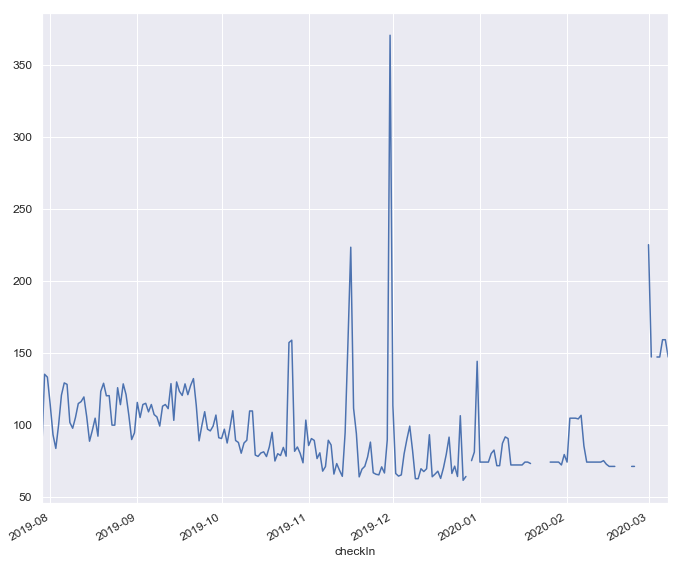

In [1258]:
# Time Series Visualization
TS_1star.plot()

In [1259]:
TS_1star.sort_values(ascending = False) 

checkIn
2019-11-30    370.50
2020-03-01    225.00
2019-11-16    223.25
2020-03-06    159.00
2020-03-07    159.00
               ...  
2020-02-23       NaN
2020-02-26       NaN
2020-02-27       NaN
2020-02-29       NaN
2020-03-03       NaN
Name: meanPrice, Length: 224, dtype: float64

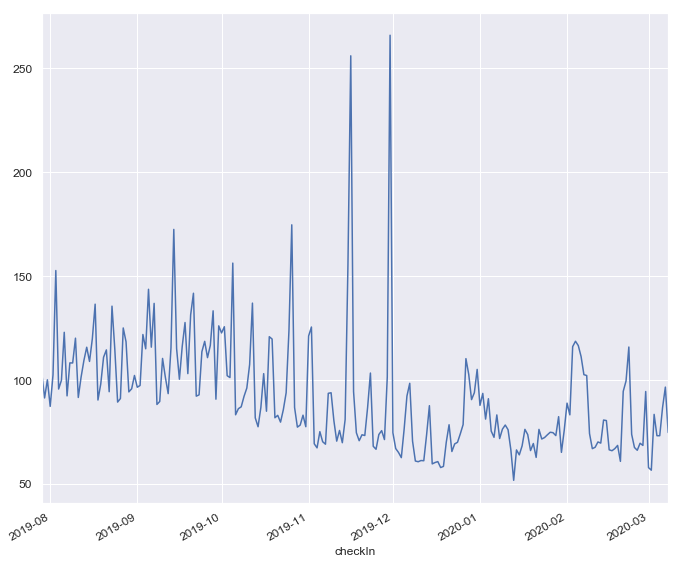

In [1260]:
# Time Series Visualization
TS_2star.plot()

In [1261]:
TS_2star.sort_values(ascending = False) 

checkIn
2019-11-30    266.0000
2019-11-16    256.1000
2019-10-26    174.7917
2019-09-14    172.5833
2019-10-05    156.3750
                ...   
2019-12-19     58.5667
2019-12-18     58.0250
2020-03-01     58.0000
2020-03-02     56.7500
2020-01-13     51.8750
Name: meanPrice, Length: 224, dtype: float64

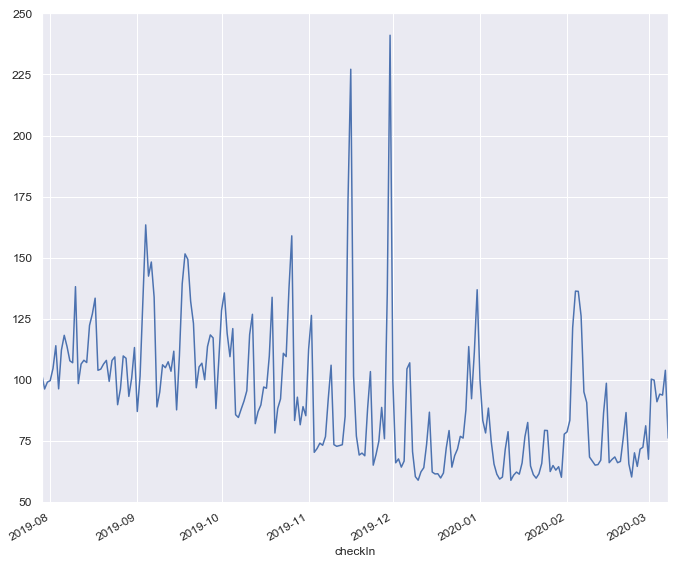

In [1262]:
# Time Series Visualization
TS_3star.plot()

In [1263]:
TS_3star.sort_values(ascending = False) 

checkIn
2019-11-30    241.0700
2019-11-16    227.1400
2019-11-15    172.2840
2019-09-04    163.4202
2019-10-26    158.9402
                ...   
2019-12-18     59.7914
2020-01-21     59.7133
2020-01-08     59.3584
2019-12-10     58.8787
2020-01-12     58.8369
Name: meanPrice, Length: 224, dtype: float64

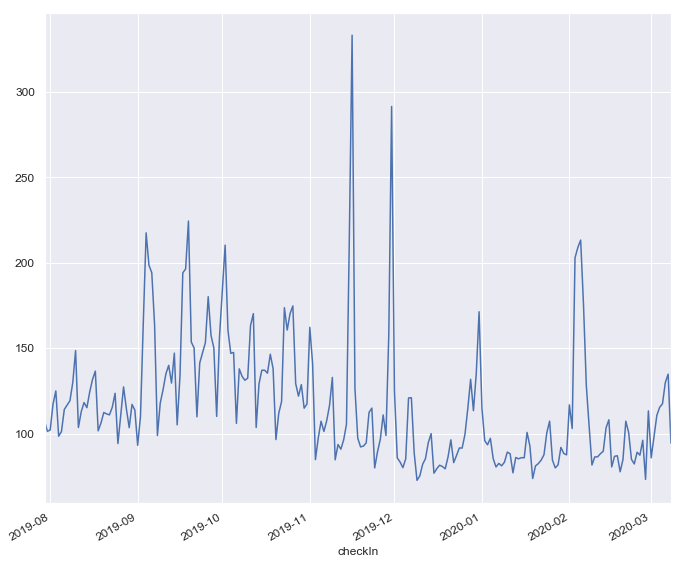

In [1264]:
# Time Series Visualization
TS_4star.plot()

In [1265]:
TS_4star.sort_values(ascending = False) 

checkIn
2019-11-16    333.1691
2019-11-30    291.4773
2019-09-19    224.4172
2019-09-04    217.5045
2020-02-05    213.2929
                ...   
2019-12-15     76.8516
2019-12-10     75.3033
2020-01-19     73.7548
2020-02-28     73.2222
2019-12-09     72.6924
Name: meanPrice, Length: 223, dtype: float64

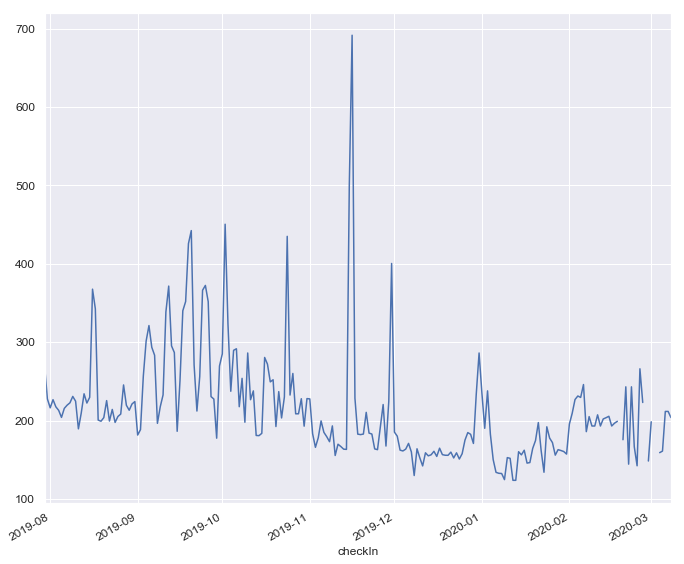

In [1266]:
# Time Series Visualization
TS_5star.plot()

In [1267]:
TS_5star.sort_values(ascending = False) 

checkIn
2019-11-16    691.6000
2019-11-15    499.1250
2019-10-02    450.4444
2019-09-20    442.3333
2019-10-24    435.0000
                ...   
2020-01-13    123.7000
2020-02-19         NaN
2020-02-28         NaN
2020-03-02         NaN
2020-03-03         NaN
Name: meanPrice, Length: 223, dtype: float64

In [1268]:
DF_1s.rename(columns={"meanPrice": "price_1s"}, inplace=True)
DF_2s.rename(columns={"meanPrice": "price_2s"}, inplace=True)
DF_3s.rename(columns={"meanPrice": "price_3s"}, inplace=True)
DF_4s.rename(columns={"meanPrice": "price_4s"}, inplace=True)
DF_5s.rename(columns={"meanPrice": "price_5s"}, inplace=True)

In [1269]:
#DF_1s.head(5)
DF_1s = DF_1s[['price_1s']]
DF_2s = DF_2s[['price_2s']]
DF_3s = DF_3s[['price_3s']]
DF_4s = DF_4s[['price_4s']]
DF_5s = DF_5s[['price_5s']]

In [1270]:
DF_final = pd.merge(DF_1s, DF_2s, on='checkIn', how='outer')
DF_final = pd.merge(DF_final, DF_3s, on='checkIn', how='outer')
DF_final = pd.merge(DF_final, DF_4s, on='checkIn', how='outer')
DF_final = pd.merge(DF_final, DF_5s, on='checkIn', how='outer')

In [1271]:
#kk = DF_final.head(5)
#kk

In [1272]:
#kk['netPrice'] = kk.mean(axis=1, skipna=True)
#kk

In [1273]:
DF_final['netPrice'] = DF_final.mean(axis=1, skipna=True)
DF_final.head(5)

,price_1s,price_2s,price_3s,price_4s,price_5s,netPrice
checkIn,,,,,,
2019-07-29,82.5,103.5000,102.3704,NaN,NaN,96.1235
2019-07-30,135.0,91.5000,96.2222,107.3611,270.4,140.0967
2019-07-31,133.0,100.2222,99.0400,101.3889,227.6,132.2502
2019-08-01,114.0,87.4444,99.6429,102.1389,216.2,123.8852
2019-08-02,93.0,102.5714,104.6538,117.3056,226.6,128.8262


In [1274]:
TS_final = DF_final['netPrice']

In [1275]:
TS_final.head(5)

checkIn
2019-07-29     96.1235
2019-07-30    140.0967
2019-07-31    132.2502
2019-08-01    123.8852
2019-08-02    128.8262
Name: netPrice, dtype: float64

In [1276]:
type(TS_final)

pandas.core.series.Series

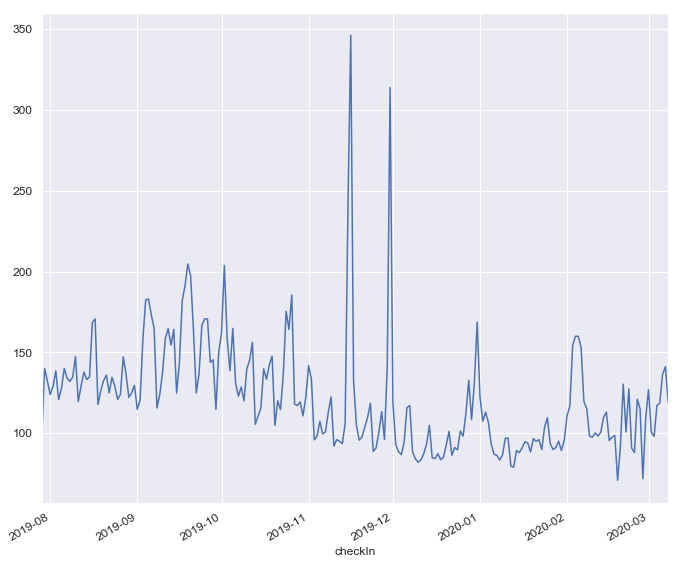

In [1277]:
# Time Series Visualization
TS_final.plot()

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

- Additive Time Series: Value = Base Level + Trend + Seasonality + Error
- Multiplicative Time Series: Value = Base Level * Trend * Seasonality * Error

There is seasonality, and the amplitude (height) of the cycles appears to be stable, suggesting that it is additive.
We will assume a additive model.

In [912]:
#TS_1star['2019-09-01':'2019-09-30'].sort_index

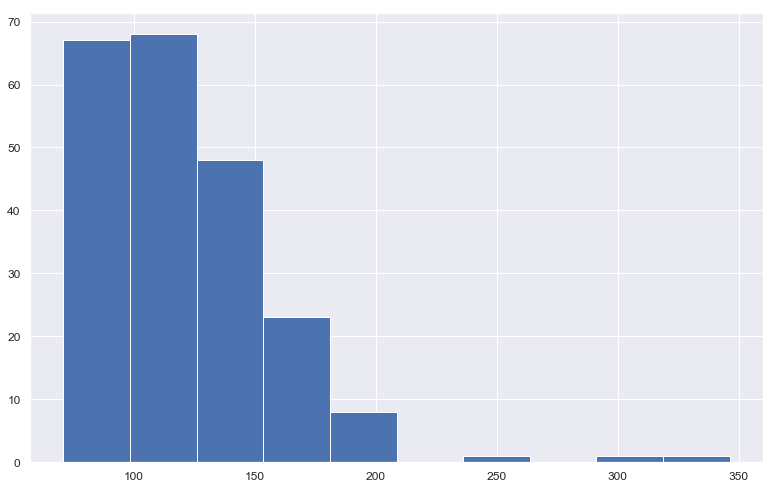

In [1038]:
# histogram plot
TS_final.hist()
plt.show()

### Decomposing the series

In [1007]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [1026]:
# Copy the series with the indices
series = TS_final.copy(deep=True)

In [1029]:
type(series)

pandas.core.series.Series

- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

Additive model is used when the variance of the time series doesn't change over different values of the time series.
The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series

In [1102]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217 entries, 2019-07-29 to 2020-03-01
Data columns (total 1 columns):
netPrice    217 non-null float64
dtypes: float64(1)
memory usage: 13.4 KB


In [1030]:
#series = series.to_frame()
#series.info()

In [1111]:
# naive decomposition
# extrapolate_trend='freq' takes care of any missing values in the trend and residuals at the beginning of the series.
decomposition = seasonal_decompose(series, freq=7, model='additive', extrapolate_trend='freq')
#decomposition = seasonal_decompose(series, model='additive')

In [1112]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
observed = decomposition.observed

In [1113]:
#observed.iloc("2020-02-28")
observed.ix["2019-10-09"]

,netPrice
checkIn,
2019-10-09,119.9747


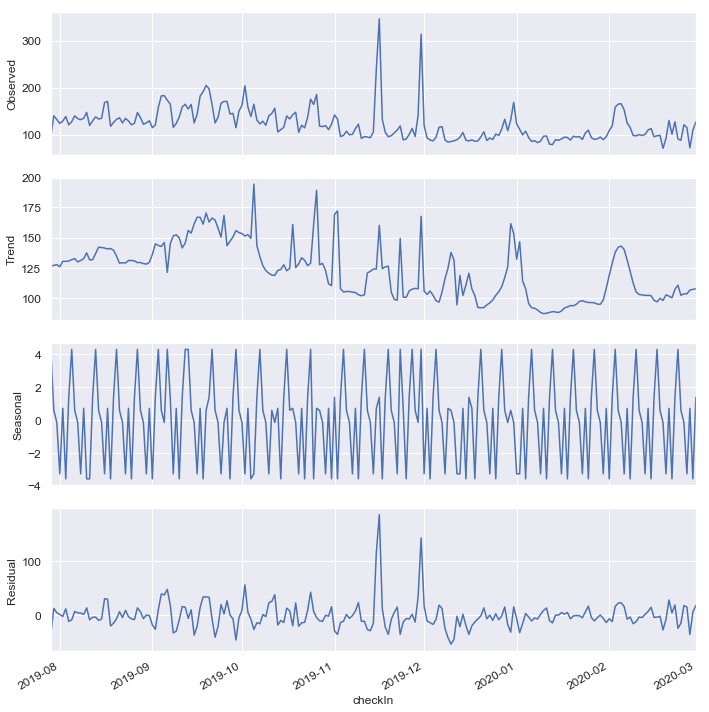

In [1114]:
decomposition.plot()
plt.show()

The residuals are also interesting, showing 2 periods of high variability in Nov-Dec.

In [1096]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([seasonal, trend, residual, observed], axis=1)
df_reconstructed.columns = ['seasonal', 'trend', 'residual', 'observed']

In [1097]:
df_reconstructed.head(5)

,seasonal,trend,residual,observed
checkIn,,,,
2019-07-29,2.1793,121.0946,-27.1504,96.1235
2019-07-30,1.9196,121.7265,16.4506,140.0967
2019-07-31,6.2245,122.3585,3.6672,132.2502
2019-08-01,1.4151,122.9905,-0.5204,123.8852
2019-08-02,15.1229,123.6225,-9.9193,128.8262


In [1098]:
df_reconstructed.sort_values(by=['residual'])

,seasonal,trend,residual,observed
checkIn,,,,
2020-02-28,15.1229,121.4375,-64.7421,71.8184
2020-01-30,44.3213,107.1726,-62.2361,89.2579
2019-10-09,44.3213,136.4938,-60.8405,119.9747
2020-02-29,44.3213,122.0094,-56.9724,109.3583
2019-12-17,13.1610,120.2559,-44.5631,88.8538
2019-12-15,3.2809,127.5030,-42.6202,88.1637
2020-01-12,13.1610,107.2629,-40.8017,79.6223
2019-12-16,-0.9056,127.1528,-39.5789,86.6684
2019-12-10,-4.1813,128.6273,-39.0617,85.3843


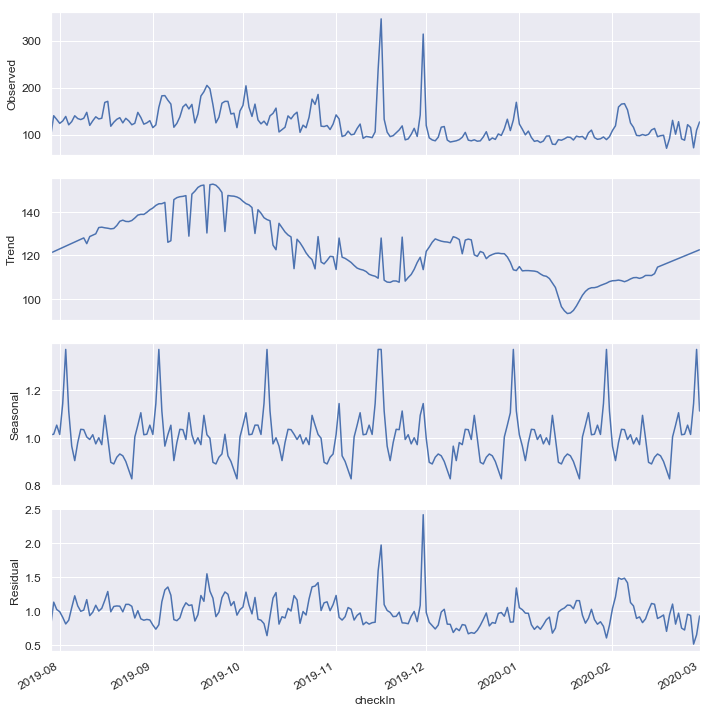

In [1099]:
decomposition = seasonal_decompose(series, freq=30, model='multiplicative', extrapolate_trend='freq')
decomposition.plot()
plt.show()

# Predictive model

In [ ]:
series = series.to_frame()

In [1053]:
series.head(5)

,netPrice
checkIn,
2019-07-29,96.1235
2019-07-30,140.0967
2019-07-31,132.2502
2019-08-01,123.8852
2019-08-02,128.8262


In [1085]:
df_hotel_events.head(5)

,propertyId,checkIn,advance,stars,netPrice,hasEvent
0,12656,2019-07-30,7,2 star,85.0,False
1,12656,2019-07-31,7,2 star,85.0,False
2,12656,2019-08-01,7,2 star,103.0,True
4,12656,2019-08-04,7,2 star,94.0,False
5,12656,2019-08-08,14,2 star,160.0,False


In [1056]:
tmp = df_hotel_events[['checkIn', 'hasEvent']]

In [1060]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 2051
Data columns (total 2 columns):
checkIn     217 non-null datetime64[ns]
hasEvent    217 non-null bool
dtypes: bool(1), datetime64[ns](1)
memory usage: 3.6 KB


In [1059]:
tmp.drop_duplicates(keep='first', inplace=True)

In [1061]:
tmp.head(5)

,checkIn,hasEvent
0,2019-07-30,False
1,2019-07-31,False
2,2019-08-01,True
4,2019-08-04,False
5,2019-08-08,False


In [1062]:
events = pd.merge(series, tmp, left_on='checkIn', right_on='checkIn', how='inner')

In [1063]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 216
Data columns (total 3 columns):
checkIn     217 non-null datetime64[ns]
netPrice    217 non-null float64
hasEvent    217 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [1064]:
events.head(5)

,checkIn,netPrice,hasEvent
0,2019-07-29,96.1235,False
1,2019-07-30,140.0967,False
2,2019-07-31,132.2502,False
3,2019-08-01,123.8852,True
4,2019-08-02,128.8262,False


In [1075]:
from sklearn.metrics import precision_recall_fscore_support

In [1080]:
y_true = np.array(['cat', 'dog', 'pig', 'cat', 'dog'])
y_pred = np.array(['cat', 'pig', 'dog', 'cat', 'cat'])

In [1082]:
y_true = np.array([True, True, False, False, False])
y_pred = np.array([True, False, True, True, False])

In [1084]:
# Returns: precision, recall, fbeta_score, support
# support: The number of occurrences of each label in y_true
precision_recall_fscore_support(y_true, y_pred, average='binary')

(0.3333333333333333, 0.5, 0.4, None)

In [1078]:
precision_recall_fscore_support(y_true, y_pred, average='weighted')

(0.2222222222222222, 0.3333333333333333, 0.26666666666666666, None)

In [1079]:
precision_recall_fscore_support(y_true, y_pred, average=None, labels=['pig', 'dog', 'cat'])

(array([0.        , 0.        , 0.66666667]),
 array([0., 0., 1.]),
 array([0. , 0. , 0.8]),
 array([2, 2, 2], dtype=int64))

In [ ]:
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision

In [1067]:
from sklearn.datasets import make_classification
#from sklearn.cross_validation import StratifiedShuffleSplit
import sklearn.cross_validation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
X, y = make_classification(n_samples=100, n_informative=10, n_classes=3)
sss = StratifiedShuffleSplit(y, n_iter=1, test_size=0.5, random_state=0)
for train_idx, test_idx in sss:
    X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print(f1_score(y_test, y_pred, average="macro"))
    print(precision_score(y_test, y_pred, average="macro"))
    print(recall_score(y_test, y_pred, average="macro")) 

ModuleNotFoundError: No module named 'sklearn.cross_validation'

## Other plots

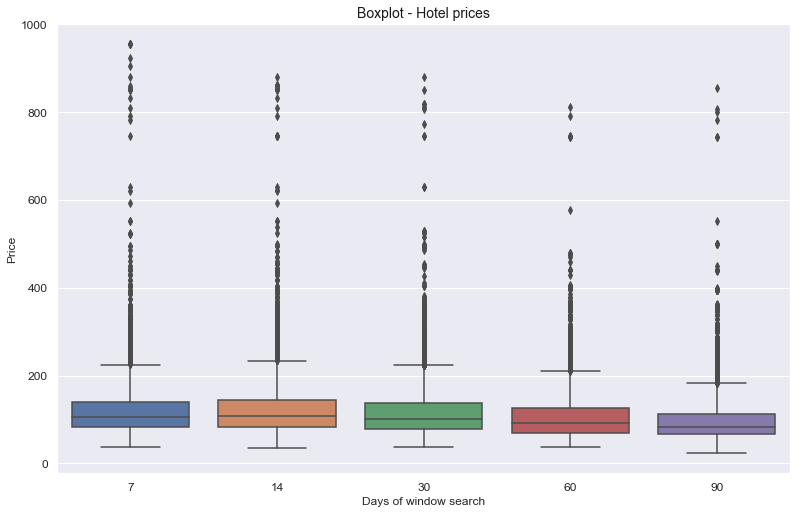

In [516]:
# Vertical boxplot grouped by window search
fig, ax = plt.subplots()
sns.boxplot(data=df_hotels, x='advance', y='netPrice', ax=ax)
ax.set(title="Boxplot - Hotel prices", xlabel='Days of window search', ylabel='Price')
fig.show()

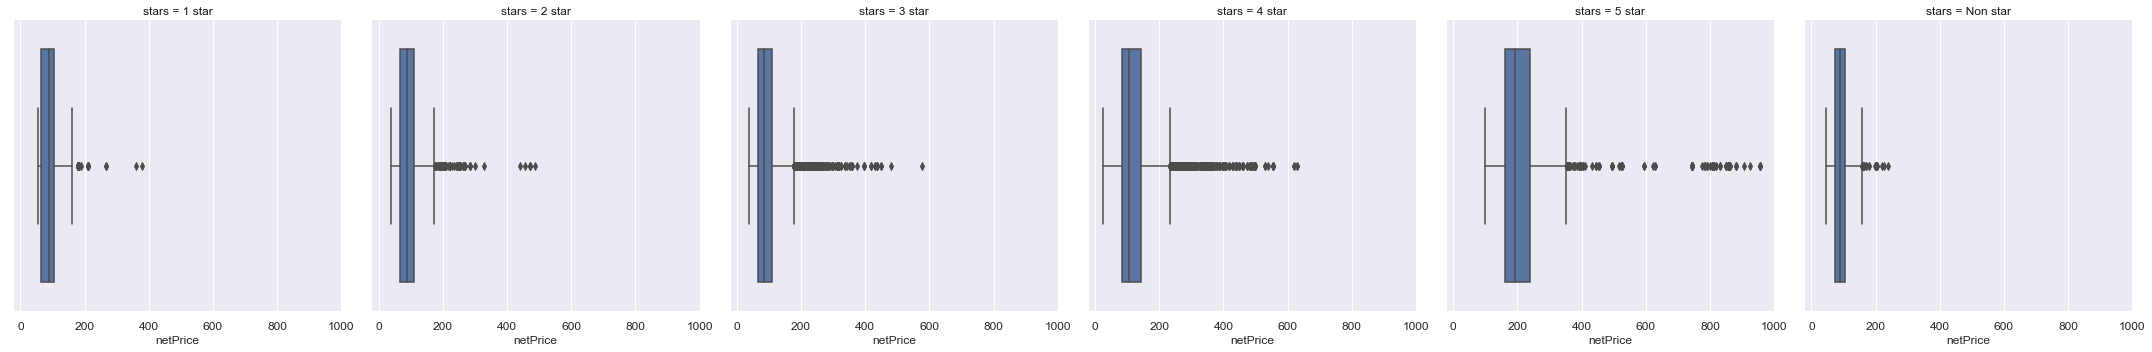

<Figure size 842.4x595.44 with 0 Axes>

In [524]:
sns.factorplot(data=df_hotels, x='netPrice', col='stars', kind='box')
plt.show()
plt.clf()

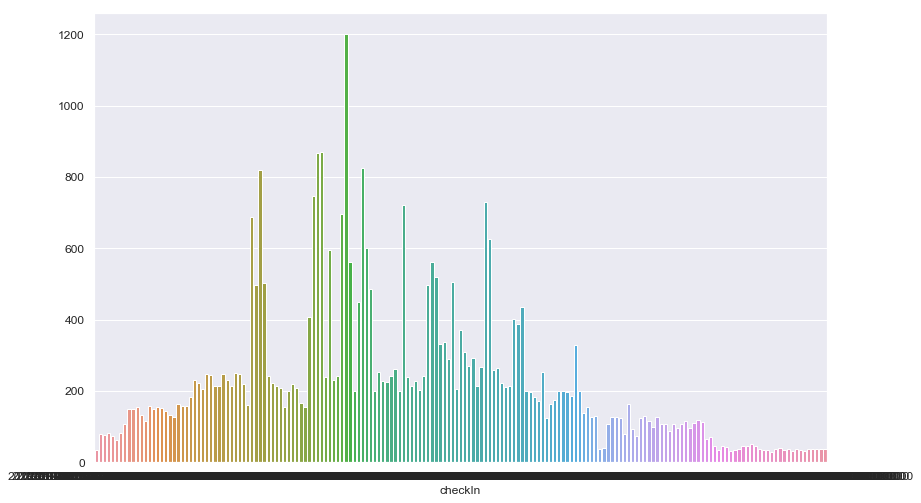

In [371]:
sns.barplot(by_day.index, by_day.values)
#by_day.plot();

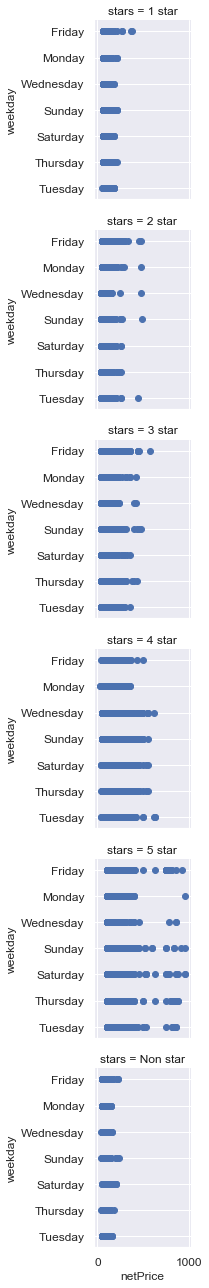

<Figure size 842.4x595.44 with 0 Axes>

In [525]:
g = sns.FacetGrid(data=df_hotels, row='stars', \
                  row_order=['1 star','2 star','3 star','4 star','5 star','Non star'])
g.map(plt.scatter, 'netPrice', 'weekday')
plt.show()
plt.clf()

In [301]:
# Showing the trend
#fig, ax = plt.subplots()
#sns.regplot(data=df_hotels, x='month', y='netPrice', x_jitter=.1, x_estimator=np.mean, ax=ax)
#ax.set(title="Residual Plot - Hotel prices", xlabel='Month', ylabel='Price')
#fig.show()
#fig.clf()

## Windows search

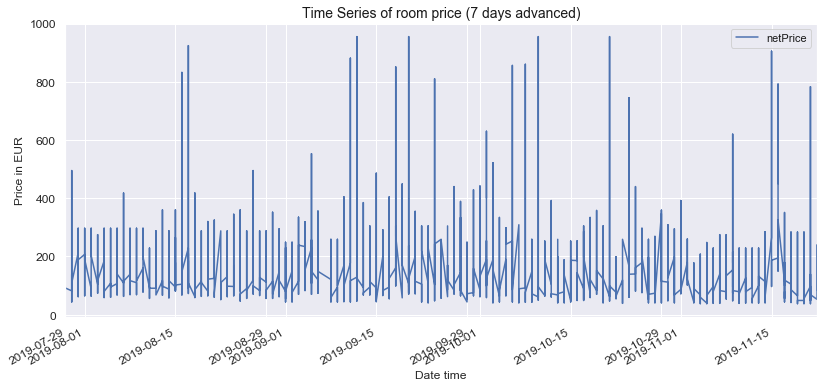

In [517]:
df_hotels_7.plot(x='checkIn', y='netPrice', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in EUR')
plt.title('Time Series of room price (7 days advanced)');

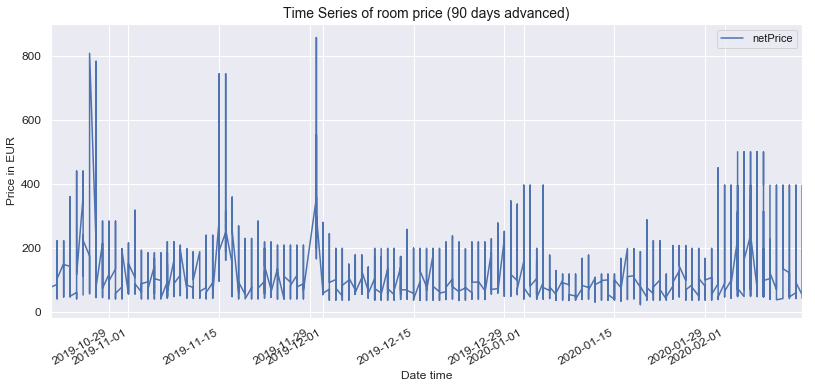

In [518]:
df_hotels_90.plot(x='checkIn', y='netPrice', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Price in EUR')
plt.title('Time Series of room price (90 days advanced)');

# Cluster-based models

- k-means
- isolation forest
- clustering

Potential outliers:
- eur
- srch_booking_window (days between search and first stay date)

# K-means

- create 'k' similar clusters of instances  
- Instances outside of clusters = possible anomalies 

We are going to use K-Means clustering which will help us cluster the data points (salary values in our case). The implementation that we are going to be using for KMeans uses Euclidean distance internally. Let's get started.

In [207]:
# Determine optimal cluster num using elbow method 
from sklearn.cluster import KMeans

data = df_hotels[['netPrice', 'advance',]]
n_cluster = range(1, 20)

kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

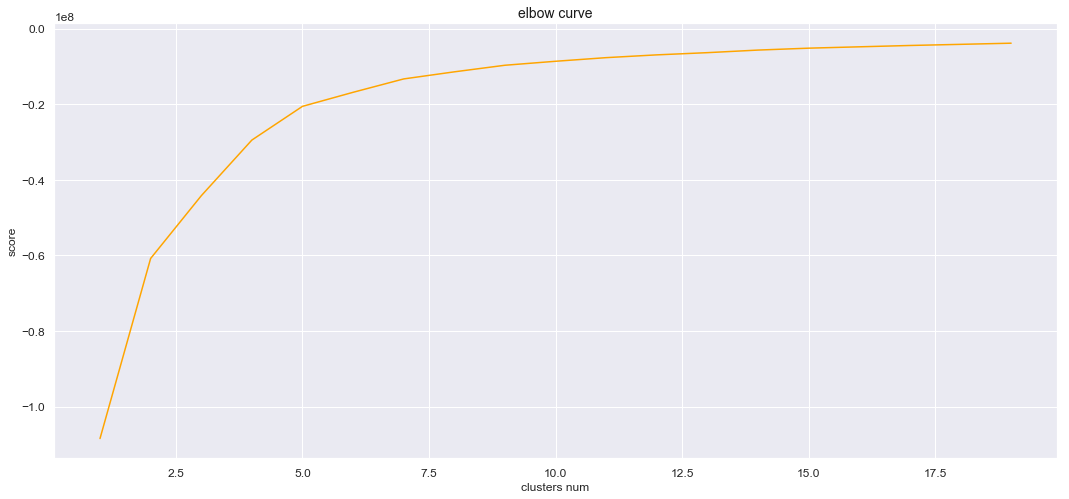

In [208]:
# elbow curve 
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(n_cluster, scores, color = 'orange')

plt.xlabel('clusters num')
plt.ylabel('score')
plt.title('elbow curve')
plt.show();

From the above elbow curve, we see that the graph levels off after 10 clusters, implying that addition of more clusters do not explain much more of the variance in our relevant variable; in this case netPrice.
We set n_clusters=10, and upon generating the k-means output use the data to plot the 3D clusters.

In [211]:
# k means output 
X = df_hotels[['netPrice', 'advance']]
X = X.reset_index(drop = True)

km = KMeans(n_clusters = 7)
km.fit(X)
km.predict(X)

labels = km.labels_

X.head()

,netPrice,advance
0,85.0,7.0
1,85.0,7.0
2,103.0,7.0
3,94.0,7.0
4,160.0,14.0


# 3D clusters 
plot using k means output 

In [182]:
# Convert the price values to a numpy array
price_raw = df_hotels_7['netPrice'].values

# For compatibility with the SciPy implementation
price_raw = price_raw.reshape(-1, 1)
price_raw = price_raw.astype('float64')

In [200]:
# Import kmeans from SciPy
from scipy.cluster.vq import kmeans

# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(price_raw, 4)

In [201]:
print(centroids)

[[298.79435484]
 [116.9289454 ]
 [169.38729017]
 [ 84.01754386]]


In [202]:
print(avg_distance)

14.30541071533636


In [203]:
import scipy.cluster as cluster

# Get the groups (clusters) and distances
groups, cdist = cluster.vq.vq(price_raw, centroids)
print(groups)

[3 3 1 ... 3 3 2]


In [391]:
#plt.scatter(price_raw, np.arange(0,100), c=groups)
#plt.xlabel('Prices in (EUR)')
#plt.ylabel('Indices')
#plt.show()

### Hotel Malcom And Barret

In [497]:
#df_MB = df_hotels.query("name=='Hotel Malcom and Barret' and checkIn=='2019-09-05'")
df_MB = df_hotels.query("name=='Hotel Malcom and Barret'")
#df_MB.reset_index(drop=True, inplace=True)
#df_MB.set_index(df_MB.checkIn)
df_MB.head(5)

,name,propertyId,checkIn,stars,score,advance,propertyType,district,longitude,latitude,netPrice,weekday,month
300,Hotel Malcom and Barret,483261,2019-07-29,3 star,8.7,7,Hotel,Quatre Carreres,-0.371,39.4507,85.0,Monday,July
1690,Hotel Malcom and Barret,483261,2019-07-30,3 star,8.7,7,Hotel,Quatre Carreres,-0.371,39.4507,82.0,Tuesday,July
3570,Hotel Malcom and Barret,483261,2019-07-31,3 star,8.7,7,Hotel,Quatre Carreres,-0.371,39.4507,82.0,Wednesday,July
5351,Hotel Malcom and Barret,483261,2019-08-01,3 star,8.7,7,Hotel,Quatre Carreres,-0.371,39.4507,79.0,Thursday,August
7092,Hotel Malcom and Barret,483261,2019-08-02,3 star,8.7,7,Hotel,Quatre Carreres,-0.371,39.4507,89.0,Friday,August


In [503]:
# produces Pandas Series
df_MB_series = df_MB.groupby('checkIn')['netPrice'].mean() 
df_MB_series

checkIn
2019-07-29    85.0
2019-07-30    82.0
2019-07-31    82.0
2019-08-01    79.0
2019-08-02    89.0
              ... 
2020-02-09    48.0
2020-02-10    48.0
2020-02-11    48.0
2020-02-12    53.0
2020-02-13    53.0
Name: netPrice, Length: 192, dtype: float32

In [342]:
df_MB_TS = df_MB.filter(['checkIn','netPrice'])
df_MB_TS_mean = df_MB_TS.groupby(['checkIn']).mean().reset_index()
df_MB_TS_mean.set_index('checkIn', inplace=True)
df_MB_TS_mean.head(10)

,netPrice
checkIn,
2019-07-29,85.0
2019-07-30,82.0
2019-07-31,82.0
2019-08-01,79.0
2019-08-02,89.0
2019-08-03,99.0
2019-08-04,82.0
2019-08-05,82.5
2019-08-06,85.5


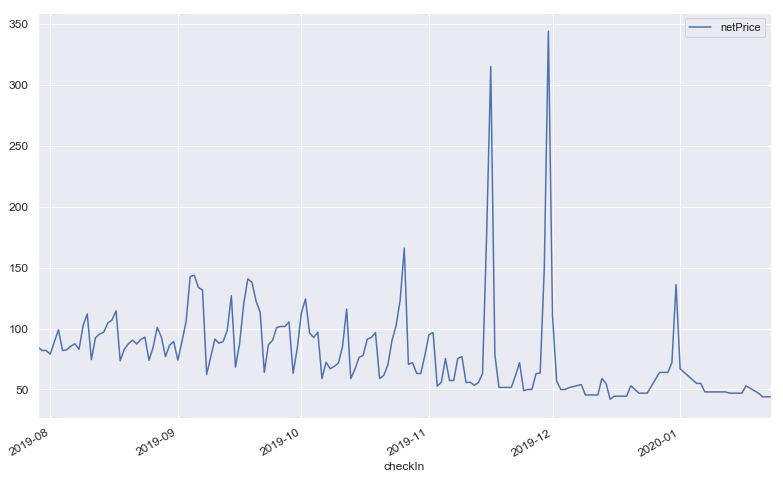

In [344]:
# Time Series Visualizations
df_MB_TS_mean.plot()

In [519]:
df_MB_TS_monthly = df_MB_TS_mean.asfreq('M')
df_MB_TS_monthly.plot()

NameError: name 'df_MB_TS_mean' is not defined

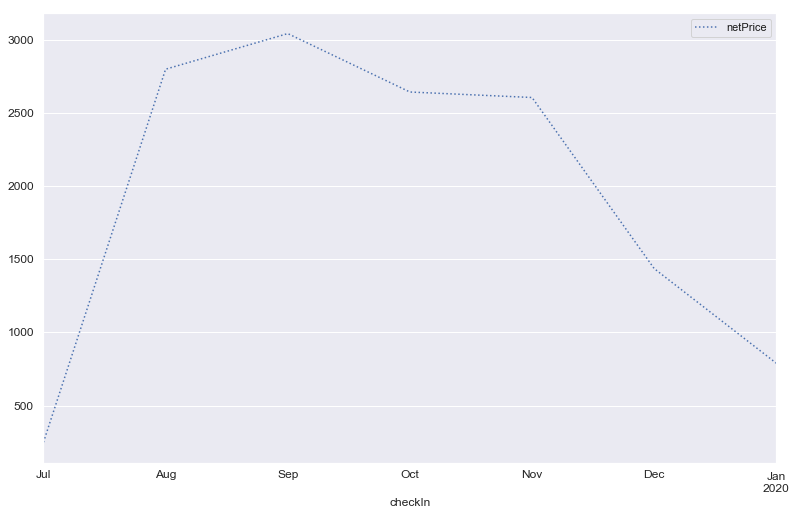

In [346]:
monthly = df_MB_TS_mean.resample('M').sum()
monthly.plot (style=[':','--','-'])

In [339]:
# Time Series Visualizations
#f, ax = plt.subplots(1)
#xdata = df_LasArenas[['checkIn']]
#ydata = df_LasArenas[['netPrice']]
#ax.plot(x=xdata, y=ydata, figsize=(12,6))
#ax.set_ylim(0, max(ydata))
#plt.set(xlim=(0, 900))
#df_MB_TS.plot(x='checkIn', y='netPrice', figsize=(12,6))
#plt.xlabel('Date time')
#plt.ylabel('Price in EUR')
#plt.title('Las Arenas - Time Series of room price by date time of search');

In [374]:
#df_LasArenas.netPrice.min()
#df_minPrice = df_LasArenas.loc[df_LasArenas['netPrice'] == df_LasArenas.netPrice.min()]

In [312]:
#df_LasArenas.netPrice.max()
#df_LasArenas.loc[df_LasArenas['netPrice'].idxmax()]
#df_maxPrice = df_LasArenas.loc[df_LasArenas['netPrice'] == 851]
#df_190912 = df_LasArenas.loc[df_LasArenas['checkIn'] == '2019-12-31']
#df_maxPrice

### Weekday

In [417]:
weekday_names = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_mean = df_hotels[["weekday", "netPrice"]].groupby("weekday").mean()

In [418]:
# To be ordered by weekday
weekday_mean = weekday_mean.loc[weekday_names]
weekday_mean.netPrice

weekday
Monday       107.6783
Tuesday      119.9106
Wednesday    123.5240
Thursday     124.5761
Friday       133.5718
Saturday     139.4936
Sunday       100.8340
Name: netPrice, dtype: float32

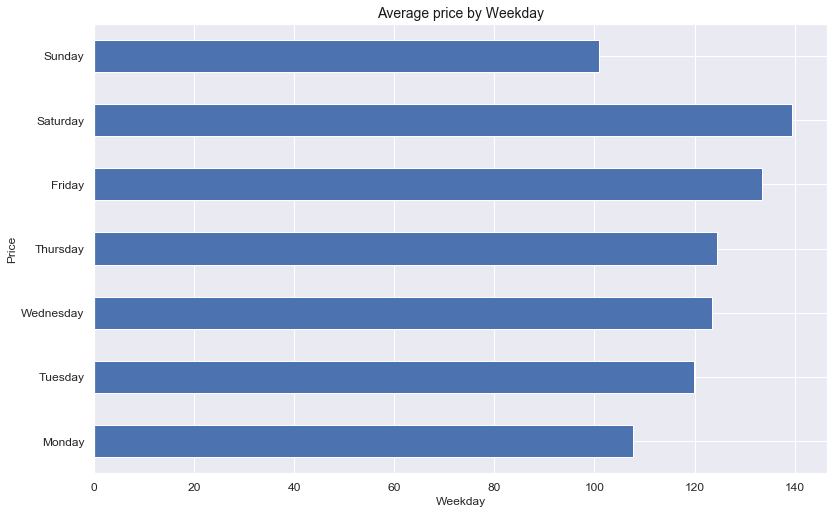

In [420]:
fig = weekday_mean.netPrice.plot(kind="barh", fig=(6,4));
#sns.barplot(y="netPrice", data=weekday_mean)
fig.set_title('Average price by Weekday')
plt.xlabel("Weekday")
plt.ylabel("Price")
plt.show(fig)
# TODO: print mean

In [435]:
monthNames = ["January","February","March","April","May","June","July","August","September","October","November","December"]
df_monthMean = df_hotels.groupby("month").mean()
# To be ordered by weekday
#df_monthMean = df_monthMean.loc[monthNames]
#df_monthMean.reset_index

In [436]:
df_monthMean

,propertyId,score,advance,netPrice,longitude,latitude
month,,,,,,
August,636191.4820,8.5115,13.2846,118.3713,-0.3682,39.4690
December,706349.2500,8.5170,90.0000,89.9455,-0.3664,39.4689
July,482148.5938,8.4703,7.0000,109.2812,-0.3676,39.4701
November,650045.4227,8.5094,85.3759,101.0200,-0.3667,39.4689
October,664407.6042,8.5137,63.4501,120.0439,-0.3671,39.4688
September,643835.0413,8.5140,26.6830,135.7480,-0.3667,39.4685


In [432]:
df_monthMean[['score','advance','netPrice']]

,score,advance,netPrice
month,,,
January,NaN,NaN,NaN
February,NaN,NaN,NaN
March,NaN,NaN,NaN
April,NaN,NaN,NaN
May,NaN,NaN,NaN
June,NaN,NaN,NaN
July,8.4703,7.0000,109.2812
August,8.5115,13.2846,118.3713
September,8.5140,26.6830,135.7480


In [390]:
#fig = df_monthMean.netPrice.plot(kind="bar", fig=(10,4));
#fig.set_title('Avg price per Month')
#plt.xlabel("Month")
#plt.ylabel("Price")
#plt.show(fig)
#ax = sns.barplot(x="Month", y="Price", data=df_monthMean)

In [201]:
#plt.figure(figsize=(16, 6))
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
#fig.suptitle('Average Price', fontsize=16)
#ax2.set_title('Instances')
#ax2 = month_mean.netPrice.plot(kind="bar")
#ax1 = month_mean.netPrice.plot(kind="bar")
#plt.show()

### Stars

In [263]:
stars_df = df_hotels[["name","stars"]]
# Drop duplicates
stars_df.drop_duplicates(keep='first', inplace=True)

In [265]:
stars_df

,name,stars
1524,Sol Playa,2 star
1670,Melia Plaza Valencia,4 star
1589,Hotel Turia,4 star
73,El Coso,3 star
1539,Hotel Miramar,2 star
1731,El Globo,1 star
100,Petit Palace Plaza de la Reina,3 star
1563,Eurostars Gran Valencia,4 star
1522,Hotel Sercotel Acteón Valencia,4 star
120260,Eurostars Acteón,4 star


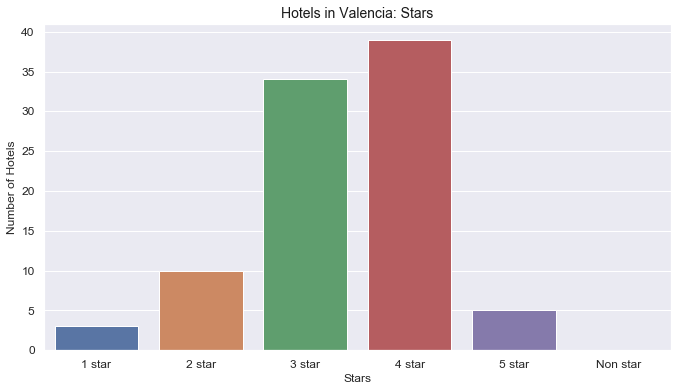

In [266]:
plt.figure(figsize=(10, 6))
fig = sns.countplot(x="stars", data=stars_df)
fig.set_title('Hotels in Valencia: Stars', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Stars")
plt.ylabel("Number of Hotels");

As we can see from the visualization 4 star hotels are the most commonly ones followed by 3 star.

In [336]:
hotels_NA_stars = hotels_df.query("stars=='-'")
hotels_1_star = hotels_df.query("stars=='1 star'")
hotels_2_star = hotels_df.query("stars=='2 star'")
hotels_3_star = hotels_df.query("stars=='3 star'")
hotels_4_star = hotels_df.query("stars=='4 star'")
hotels_5_star = hotels_df.query("stars=='5 star'")

In [337]:
hotels_2_star.head()

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
propertyId,,,,,,,,,,,,,
12656,Sol Playa,2019-07-30,2019-07-31,2 star,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Tuesday,July
12656,Sol Playa,2019-07-31,2019-08-01,2 star,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Wednesday,July
12656,Sol Playa,2019-08-01,2019-08-02,2 star,8.3,7.0,103.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
12656,Sol Playa,2019-08-04,2019-08-05,2 star,8.3,7.0,94.0,Hotel,-0.3238,39.4651,Poblados marítimos,Sunday,August
12656,Sol Playa,2019-08-08,2019-08-09,2 star,8.3,14.0,160.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August


In [338]:
by_day_month = (hotels_2_star
            .groupby(['name', 'weekday'])
            .mean()
            .unstack()
           )
by_day_month

score                                    \
weekday                            Friday  Monday Saturday  Sunday Thursday   
name                                                                          
Ad Hoc Carmen                      8.9000  8.9000   8.9000  8.9000   8.9000   
Casual De La Música Valencia       7.4385  7.4294   7.4357  7.4294   7.4267   
Casual Del Cine Valencia           8.6000  8.6000   8.6000  8.6000   8.6000   
Casual Vintage Valencia            8.5000  8.5000   8.5000  8.5000   8.5000   
Hotel Miramar                         NaN  8.4000      NaN  8.4000   8.4000   
Md Design Hotel - Portal Del Real  9.1000  9.1000   9.1000  9.1000   9.1000   
Sol Playa                          8.3000  8.3000   8.3000  8.3000   8.3000   
Sweet Hotel Continental            8.3000  8.3000   8.3000  8.3000   8.3000   

                                                     advance           \
weekday                           Tuesday Wednesday   Friday   Monday   
name                                                                    
Ad Hoc Carmen                      8.9000    8.9000  23.1667  46.3846   
Casual De La Música Valencia       7.4417    7.4313  44.7692  44.2941   
Casual Del Cine Valencia           8.6000    8.6000  39.5625  42.2222   
Casual Vintage Valencia            8.5000    8.5000  37.6875  42.2222   
Hotel Miramar                      8.4000    8.4000      NaN  51.7857   
Md Design Hotel - Portal Del Real  9.1000    9.1000  39.5625  42.2222   
Sol Playa                          8.3000    8.3000  60.0000  50.1429   
Sweet Hotel Continental            8.3000    8.3000  38.2000  41.4375   

                                            ... longitude                    \
weekday                           Saturday  ...  Thursday Tuesday Wednesday   
name                                        ...                               
Ad Hoc Carmen                      37.0000  ...   -0.3762 -0.3762   -0.3762   
Casual De La Música Valencia       42.0714  ...   -0.3789 -0.3789   -0.3789   
Casual Del Cine Valencia           38.2000  ...   -0.3776 -0.3776   -0.3776   
Casual Vintage Valencia            40.2000  ...   -0.3766 -0.3766   -0.3766   
Hotel Miramar                          NaN  ...   -0.3237 -0.3237   -0.3237   
Md Design Hotel - Portal Del Real  40.7647  ...   -0.3723 -0.3723   -0.3723   
Sol Playa                          60.0000  ...   -0.3238 -0.3238   -0.3238   
Sweet Hotel Continental            39.7333  ...   -0.3746 -0.3746   -0.3746   

                                  latitude                             \
weekday                             Friday   Monday Saturday   Sunday   
name                                                                    
Ad Hoc Carmen                      39.4775  39.4775  39.4775  39.4775   
Casual De La Música Valencia       39.4700  39.4700  39.4700  39.4700   
Casual Del Cine Valencia           39.4691  39.4691  39.4691  39.4691   
Casual Vintage Valencia            39.4713  39.4713  39.4713  39.4713   
Hotel Miramar                          NaN  39.4643      NaN  39.4643   
Md Design Hotel - Portal Del Real  39.4770  39.4770  39.4770  39.4770   
Sol Playa                          39.4651  39.4651  39.4651  39.4651   
Sweet Hotel Continental            39.4698  39.4698  39.4698  39.4698   

                                                               
weekday                           Thursday  Tuesday Wednesday  
name                                                           
Ad Hoc Carmen                      39.4775  39.4775   39.4775  
Casual De La Música Valencia       39.4700  39.4700   39.4700  
Casual Del Cine Valencia           39.4691  39.4691   39.4691  
Casual Vintage Valencia            39.4713  39.4713   39.4713  
Hotel Miramar                      39.4643  39.4643   39.4643  
Md Design Hotel - Portal Del Real  39.4770  39.4770   39.4770  
Sol Playa                          39.4651  39.4651   39.4651  
Sweet Hotel Continental            39.4698  39.4

In [357]:
sns.distplot(hotels_df["netPrice"])

NameError: name 'hotels_df' is not defined

In [358]:
#Plotting the mean and the 95% confidence interval around the mean
g = sns.relplot(x="checkIn", y="netPrice", kind="line", data=df_hotels_4)
# ha: horizontal alignment
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Check-in Date", "Price");
g.ax.margins(x=0.1, y=0.05)

NameError: name 'df_hotels_4' is not defined

In [359]:
#Plotting the mean and the 95% confidence interval around the mean
g = sns.relplot(x="checkIn", y="netPrice", kind="line", data=df_hotels_5)
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Check-in Date", "Price");

NameError: name 'df_hotels_5' is not defined

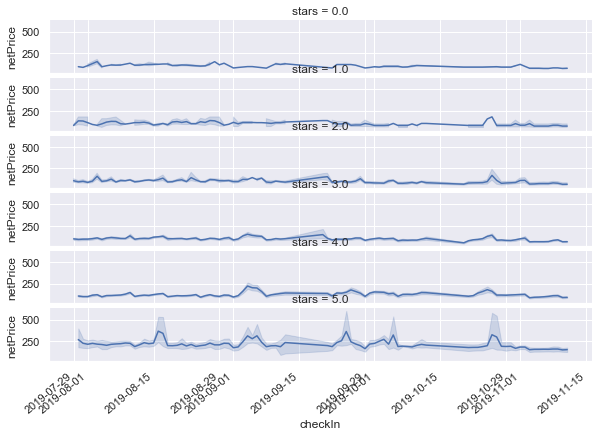

In [79]:
g = sns.relplot(x="checkIn", y="netPrice", row="stars", kind="line", data=df_hotels);
g.fig.autofmt_xdate(rotation=40, ha='right')
g.fig.set_size_inches(10, 6)

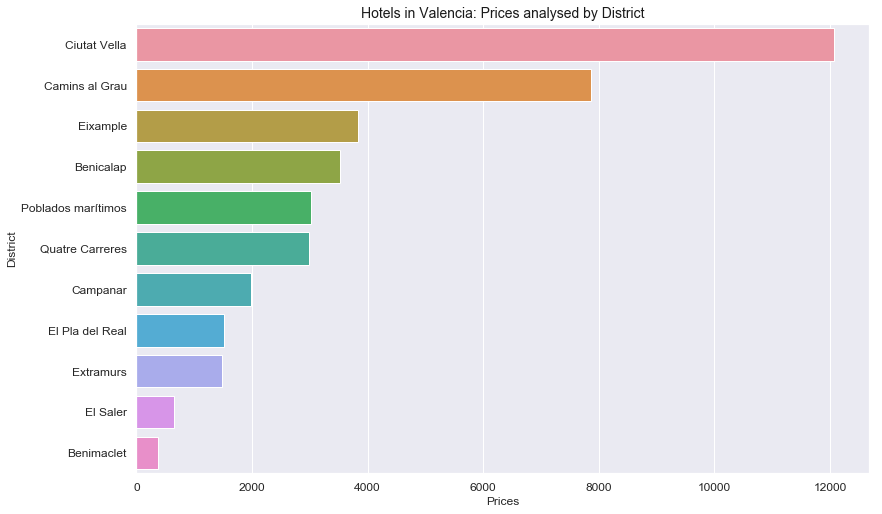

In [379]:
fig = sns.countplot(y="district", data=df_hotels, order = df_hotels['district'].value_counts().index)
fig.set_title(label='Hotels in Valencia: Prices analysed by District', \
              fontdict={'fontsize': mpl.rcParams['axes.titlesize'], 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Prices")
plt.ylabel("District")
plt.show(fig)

In [267]:
# Mean price per district
df_district_mean = df_hotels.groupby("district").mean().reset_index()
df_district_mean.filter(['district','score','advance','netPrice'])

,district,score,advance,netPrice
0,Benicalap,8.2331,40.7935,92.3759
1,Benimaclet,8.4367,42.8637,62.7603
2,Camins al Grau,8.5206,41.1248,97.4785
3,Campanar,8.0474,40.4919,85.6262
4,Ciutat Vella,8.7753,41.4239,124.5162
5,Eixample,8.6311,40.1781,125.1808
6,El Pla del Real,8.3975,41.0737,164.1534
7,Extramurs,8.6925,41.7443,115.1685
8,Playa de la Malvarrosa,9.0614,39.9824,60.8305
9,Poblados marítimos,8.4977,41.4421,117.1673


**More expensive district:** El Pla del Real (179.17€)  
**Cheapest district:** Benimaclet (66.35€)

In [387]:
#fig = sns.countplot(y="district", data=district_mean, order = district_mean['district'].value_counts().index)
#fig.set_title(label='Hotels in Valencia: Prices analysed by District', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
# 'fontweight': mpl.rcParams['axes.titleweight']})
#plt.xlabel("Prices")
#plt.ylabel("District")
#plt.show(fig)

### Location

According to the dataset, we have latitude and longitude on the dataset for each hotel. We are going to see the common location and how the hotels are placed.

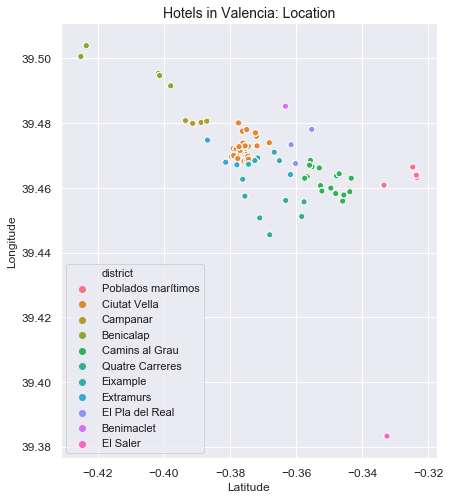

In [388]:
#df_hotels.groupby(["a", "name"]).median().index.get_level_values(1)
plt.figure(figsize=(6,8))

#fig = sns.scatterplot(x="longitude", y="latitude", hue="district", style="district", data=df_hotels);
fig = sns.scatterplot(x="longitude", y="latitude", hue="district", data=df_hotels);
fig.set_title(label='Hotels in Valencia: Location', fontdict={'fontsize': mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight']})
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show(fig)

In [86]:
#plt.figure(figsize=(10,10))
#ax = sns.countplot(x="district", hue="stars", data=df_hotels)

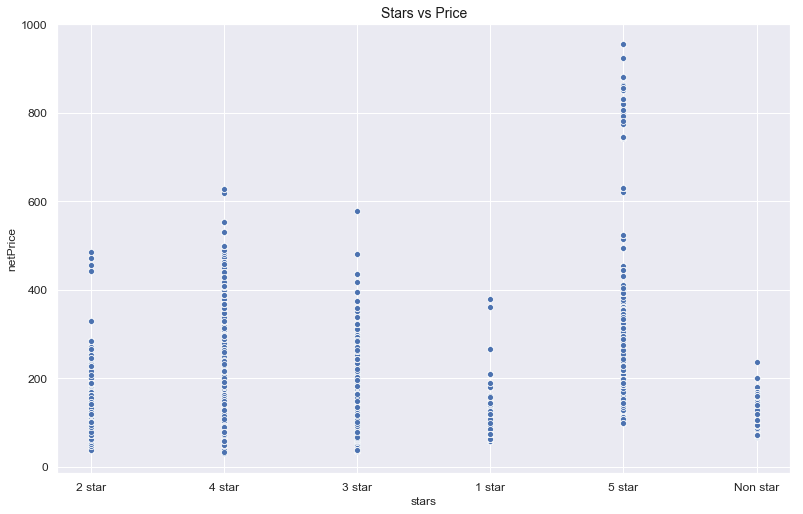

In [389]:
ax = sns.scatterplot(x="stars", y="netPrice", data=df_hotels).set_title('Stars vs Price')

In [88]:
df_hotels['checkIn'].min(), df_hotels['checkIn'].max()

(Timestamp('2019-07-29 00:00:00'), Timestamp('2019-11-11 00:00:00'))

In [89]:
df_hotels['netPrice'].min(), df_hotels['netPrice'].max()

(1.152999997138977, 924.0)

In [90]:
# Mean price per stars
stars_mean = df_hotels.groupby("stars").mean()
stars_mean

,score,advance,netPrice,longitude,latitude
stars,,,,,
0.0,9.1363,42.8493,104.4726,-0.3666,39.4671
1.0,8.0559,41.6725,103.6550,-0.3556,39.4655
2.0,8.4508,42.1372,100.5489,-0.3662,39.4709
3.0,8.4337,41.6173,102.4271,-0.3683,39.4673
4.0,8.5078,40.1447,123.2529,-0.3691,39.4698
5.0,8.8360,40.8493,217.6096,-0.3578,39.4709


In [91]:
# Mean price per month
df_hotels.groupby(df_hotels['checkIn'].dt.strftime('%B'))['netPrice'].mean().sort_values()

checkIn
November      94.7699
July         109.9309
October      119.1602
August       119.8514
September    130.9162
Name: netPrice, dtype: float32

In [92]:
df_hotels.head()

,name,checkIn,checkOut,stars,score,advance,netPrice,propertyType,longitude,latitude,district,weekday,month
propertyId,,,,,,,,,,,,,
12656,Sol Playa,2019-07-30,2019-07-31,2.0,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Tuesday,July
12656,Sol Playa,2019-07-31,2019-08-01,2.0,8.3,7.0,85.0,Hotel,-0.3238,39.4651,Poblados marítimos,Wednesday,July
12656,Sol Playa,2019-08-01,2019-08-02,2.0,8.3,7.0,103.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August
12656,Sol Playa,2019-08-04,2019-08-05,2.0,8.3,7.0,94.0,Hotel,-0.3238,39.4651,Poblados marítimos,Sunday,August
12656,Sol Playa,2019-08-08,2019-08-09,2.0,8.3,14.0,160.0,Hotel,-0.3238,39.4651,Poblados marítimos,Thursday,August


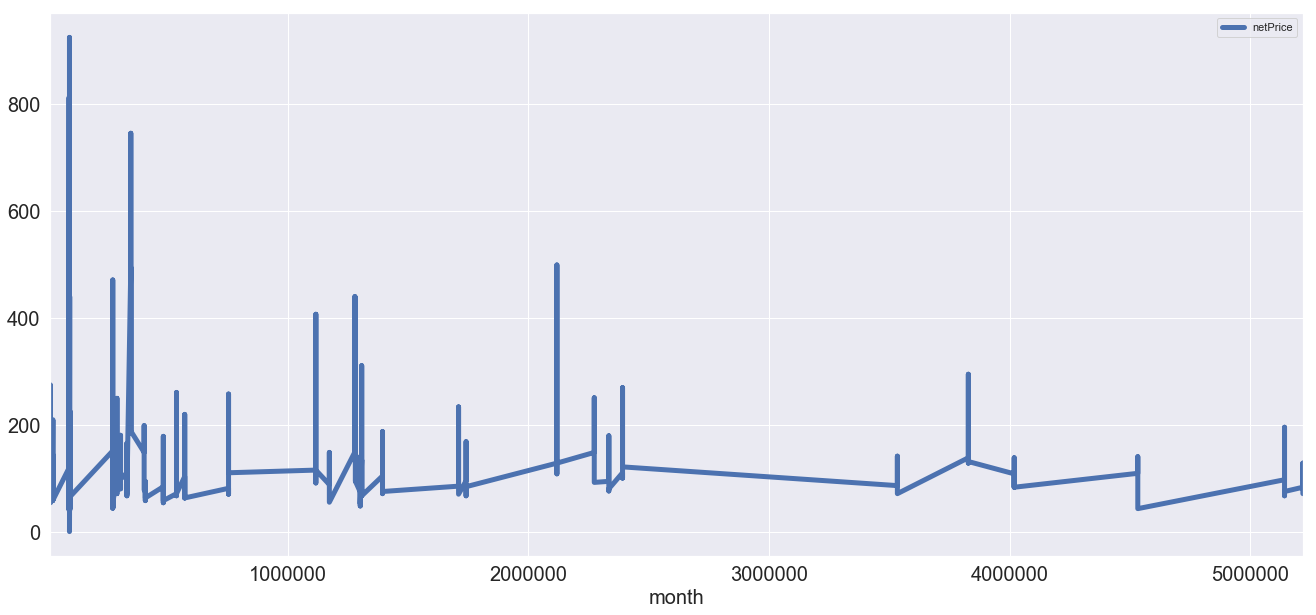

In [93]:
df_hotels[['netPrice']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('month', fontsize=20);

In [94]:
df_price = df_hotels.groupby('checkIn')['netPrice'].mean().reset_index()

In [95]:
# Indexing with Time Series Data
df_price = df_price.set_index('checkIn')
df_price.index

DatetimeIndex(['2019-07-29', '2019-07-30', '2019-07-31', '2019-08-01',
               '2019-08-02', '2019-08-03', '2019-08-04', '2019-08-05',
               '2019-08-06', '2019-08-07', '2019-08-08', '2019-08-09',
               '2019-08-10', '2019-08-11', '2019-08-12', '2019-08-13',
               '2019-08-14', '2019-08-15', '2019-08-16', '2019-08-17',
               '2019-08-18', '2019-08-19', '2019-08-20', '2019-08-21',
               '2019-08-22', '2019-08-23', '2019-08-24', '2019-08-25',
               '2019-08-26', '2019-08-27', '2019-08-28', '2019-08-29',
               '2019-08-30', '2019-08-31', '2019-09-01', '2019-09-02',
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10',
               '2019-09-11', '2019-09-12', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27', '2019-09-28', '2019-09-29',
      

In [97]:
y

checkIn
2019-07-01    108.4554
2019-08-01    120.0574
2019-09-01    133.8054
2019-10-01    118.9088
2019-11-01     95.5096
Freq: MS, Name: netPrice, dtype: float32

In [96]:
y = df_price['netPrice'].resample('MS').mean()

In [98]:
rng = pd.date_range('1/1/2019', periods=10, freq='MS')

In [99]:
rng

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [100]:
type(rng)

pandas.core.indexes.datetimes.DatetimeIndex

## TensorFlow

In [151]:
import tensorflow as tf
from tensorflow import keras
from stldecompose import decompose
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc

## Precision - Recall

In [268]:
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision

array([0.66666667, 0.5       , 1.        , 1.        ])

In [269]:
recall

array([1. , 0.5, 0.5, 0. ])

In [270]:
thresholds

array([0.35, 0.4 , 0.8 ])